# The second part of the assignment, IDS 2021-2022
In this Jupyter notebook document all your results and the way you have obtained them. Please use the _Python environment_ provided for this part of the assignment. In addition to the _Jupyter notebook_, please submit _one zip-file_ containing  other outputs you have generated that are not included in this notebook (such as pdf, jpg, and others). Please make sure that the other outputs are easily identifiable, i.e. use names as requested in the corresponding question. _You do not need to include the datasets._

This is the _only_ submission that is required (Jupyter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> Please make sure to include the names and matriculation numbers of all group members in the slot provided below. </font> If a name or a student id is missing, the student will not receive any points.

<font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    1. Timothy Clemens Borrell 436940
    
    2. 
    
    3. Jan-Lucas Uslu 381373

# Setup

In [1]:
### Display
from IPython.core.display import display, HTML

### Widgets
#import ipywidgets as widgets

### Data Handline
import pandas as pd
import numpy as np

### Utility
import math
import string
import datetime
import pickle

### Plotting
# Matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
# Matplotlib toolkits
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Seaborn
import seaborn as sns
# Plotly
import plotly.graph_objects as go
# Gespatial data with cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


### Frequent Pattern Mining
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules as arule

### Text Mining
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

### PM4Py
import pm4py
# Log Handling
from pm4py.objects.conversion.log import converter as log_converter
# Statistics
from pm4py.statistics.traces.generic.log import case_statistics
# Filtering
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.algo.filtering.log.attributes import attributes_filter
# Discovery and Conformance Checking
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
from pm4py.objects.conversion.process_tree import converter as pt_converter
# Visualization
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

C:\Users\duden\Anaconda3\envs\IDS2\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
# Pandas indexing
idx = pd.IndexSlice

Be careful if you use the **matplotlib widget** magic. If you do not close the created plots, previous plots may change if you create a new one.
So if you use this magic command, be careful about your outputs in your final submission.

In [3]:
%matplotlib inline

pd.set_option('display.max_colwidth', None)

# Q1 - Preprocessing (20 points)
In this question, we consider a US-census dataset (**census_data.csv**).
Each row contains statistics of a certain tract on a variety of, particularly income- and work-related, life aspects of US citizens.
Short column description:

| Column | Description |
| ------ | ----------- |
| CensusTract | Tract |
| State | State |
| County | County |
| TotalPop | Total population  |
| Men | Number of men |
| Women | Number of women |
| Hispanic, White, Black, Native, Asian, Pacific | Percentage of ethnic group |
| Citizen | Percentage of citizen |
| Income | Median household income |
| IncomePerCap | Income per capita |
| Poverty | Poverty rate |
| ChildPoverty | Child poverty rate |
| Professional | Employed in management, business, science, and arts (percentage) |
| Service, Office, Construction, Production | Other profession fields (percentage) |
| PrivateWork, PublicWork | Employed in private / public sector (percentage) |
| Drive, Carpool, Transit, Walk, OtherTransp | Means of commuting (percentage) |
| WorkAtHome | Working at home (percentage) |
| MeanCommute | Mean time for commuting |
| Employed | Number of employed |
| SelfEmployed | Self-employed (percentage) |
| FamilyWork | Unpaid family work (percentage) |
| Unemployment | Unemployment rate |


## Loading the Data and Initial Quality Investigation

**a)** Load the dataset into a dataframe `df`. <font color='red'>Use the CensusTract as index for your dataframe</font>. In doing so, ensure that the index is valid, that is, it does not contain any duplicate entries.

**In the subsequent questions, only modify the dataframe `df` if explicitly requested. However, you can always create working copies.**

In [4]:
df = pd.read_csv('dataset/census_data.csv', index_col = 'CensusTract')

assert pd.Index(df.index).is_unique

**b)** Show the data types of the dataframe columns as well as the first few rows. On the first sight, are there any data type problems (e.g., numerical columns having a non-numerical data type)? 

In [5]:
display(df.dtypes)
df.head()

State            object
County           object
TotalPop          int64
Men             float64
Women           float64
Hispanic        float64
White           float64
Black           float64
Native          float64
Asian           float64
Pacific         float64
Citizen           int64
Income          float64
IncomePerCap    float64
Poverty         float64
ChildPoverty    float64
Professional    float64
Service         float64
Office          float64
Construction    float64
Production      float64
Drive           float64
Carpool         float64
Transit         float64
Walk            float64
OtherTransp     float64
WorkAtHome      float64
MeanCommute     float64
Employed          int64
PrivateWork     float64
PublicWork      float64
SelfEmployed    float64
FamilyWork      float64
Unemployment    float64
dtype: object

,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
CensusTract,,,,,,,,,,,,,,,,,,,,,
1001020100,Alabama,Autauga,1948,940.0,1008.0,0.9,87.4,7.7,0.3,0.6,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1001020200,Alabama,Autauga,2156,1059.0,1097.0,0.8,40.4,53.3,0.0,2.3,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
1001020300,Alabama,Autauga,2968,1364.0,1604.0,0.0,74.5,18.6,0.5,1.4,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
1001020400,Alabama,Autauga,4423,2172.0,2251.0,10.5,82.8,3.7,1.6,0.0,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
1001020500,Alabama,Autauga,10763,4922.0,5841.0,0.7,68.5,24.8,0.0,3.8,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


## Discussion

There do not seem be any datatype problems.  
Pandas has correctly parsed each column and detect the NaN values.  
One could thing that State and County are wrongly parsed, but their type string which is object in pandas.

**c)** To improve performance and memory usage (in particular for large datasets) it is important to use **categorical** columns whenever suitable. 
Are there any categorical column candidates? Explain your answer. \
Afterwards, convert these columns into categorical columns.

In [6]:
categorical_values = ['Pacific',
                      'Transit',
                      'Walk',
                      'FamilyWork'
                    ]

for category in categorical_values:
    #bins are being calculated, this to replace the values by the bins that they are in, there is no cut needed, that's why the variable is called "a", as it is not going to be used any more.
    a, bins = pd.qcut(df[category], 10, retbins = True, duplicates = 'drop')
    #checking whether a value is part of a range. If so it will be replaced by the lower bound of the range, as these columns consist of mainly 0. 
    for i in range(len(bins)-1):
      df[category] = np.where(df[category].between(bins[i], bins[i + 1]), bins[i], df[category])
    
df[categorical_values].head()

,Pacific,Transit,Walk,FamilyWork
CensusTract,,,,
1001020100,0.0,0.0,0.1,0.0
1001020200,0.0,0.0,0.0,0.0
1001020300,0.2,0.0,0.0,0.0
1001020400,0.0,0.0,0.0,0.0
1001020500,0.0,0.0,0.0,0.0


Answer:

There are many possible columns that contain numerical values that don't hold distinguishable valuable information. In this case valuable information is not being lost if it's put into categories. <br>
It is possible to somewhat categorise all columns to a certain degree. More complex and versatile columns will lose depth and information, which is therefore not advisable.
It is therefore a better idea to bin less diversified columns, especially those containing lots of similar entries (such as zeros for example). The columns that may be eligible are: 'Pacific', 'Transit', 'Walk' or 'FamilyWork' as they have a great amount of zero-entries or entries that are close to zero. 
Categorising these columns leads to a reduction of diversity of entries to only four entries without loosing too many information about the column itself, while improving the performance of the model.


**d)** To select a good strategy to deal with missing data, it is important to get an overview over the general data distribution.
Show the basic statistics for the dataset and create 6 boxplots for the following column groupings:

    ['TotalPop', 'Men', 'Women', 'Citizen', 'Employed'],
    ['Income', 'IncomePerCap'],
    ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
    ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty'],
    ['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome'],
    ['MeanCommute']

Can you spot any (severe) data quality problems, in particular, are there unrealistic values (also considering the semantics)?

*Hint: Use the `df.describe()` function.*

In [7]:
groupings = [['TotalPop', 'Men', 'Women', 'Citizen', 'Employed'],
            ['Income', 'IncomePerCap'],
            ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'],
            ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'Poverty', 'ChildPoverty'],
            ['Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome'],
            ['MeanCommute']]

In [8]:
# Set the option to see all the columns
pd.set_option("display.max_columns", None)

#General statistics for each groupings, this is done through the df.describe() function.
df.describe()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomePerCap,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,74001.000000,73622.000000,73640.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,73311.000000,74001.000000,72901.000000,73261.000000,73166.000000,72883.000000,73194.000000,73194.000000,73194.000000,73194.000000,73194.000000,73204.000000,73204.000000,73204.000000,73204.000000,73204.000000,73204.000000,73052.000000,74001.000000,73194.000000,73194.000000,73194.000000,73194.000000,73199.000000
mean,4325.591465,2127.937437,2197.755337,16.862810,62.032106,13.272581,0.727726,4.588253,0.017092,3043.079566,57225.564862,28491.234299,16.958020,22.486827,34.798843,19.101381,23.951559,9.292337,12.856005,75.533887,9.627468,2.808441,1.893209,1.891606,4.368093,25.667357,1983.907366,78.975238,14.621566,6.233814,0.076372,9.028663
std,2129.306903,1072.200320,1095.899964,22.940695,30.684152,21.762483,4.488340,8.794003,0.055913,1475.492946,28663.331962,15047.068660,13.196518,19.190909,15.007075,8.279143,5.957279,6.023290,7.671588,15.371620,5.367321,4.452698,2.162043,2.596198,3.904990,6.964881,1073.429808,8.345758,7.535786,4.042990,0.177084,5.955441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2611.000000,128.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2891.000000,1409.000000,1460.000000,2.400000,39.400000,0.700000,0.000000,0.200000,0.000000,2037.000000,37683.000000,19123.000000,7.200000,7.000000,24.100000,13.400000,20.100000,5.000000,7.100000,72.000000,6.000000,0.000000,0.100000,0.400000,1.800000,20.800000,1249.000000,74.600000,9.600000,3.500000,0.000000,5.100000
50%,4063.000000,1987.000000,2066.000000,7.000000,71.400000,3.700000,0.000000,1.400000,0.000000,2863.000000,51094.000000,25344.000000,13.400000,17.800000,32.600000,17.900000,23.800000,8.400000,11.800000,79.700000,8.800000,0.500000,1.000000,1.100000,3.500000,25.000000,1846.000000,80.100000,13.400000,5.500000,0.000000,7.700000
75%,5442.000000,2674.000000,2774.000000,20.400000,88.300000,14.400000,0.400000,4.800000,0.000000,3838.000000,70117.000000,33894.000000,23.100000,33.800000,43.875000,23.600000,27.500000,12.500000,17.400000,84.900000,12.300000,3.500000,2.900000,2.500000,5.900000,29.800000,2553.000000,84.600000,18.200000,8.100000,0.000000,11.400000
max,53812.000000,27962.000000,27250.000000,100.000000,100.000000,100.000000,100.000000,91.300000,0.200000,37416.000000,248750.000000,254204.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,14.800000,7.100000,100.000000,100.000000,80.000000,24075.000000,100.000000,100.000000,100.000000,0.600000,100.000000


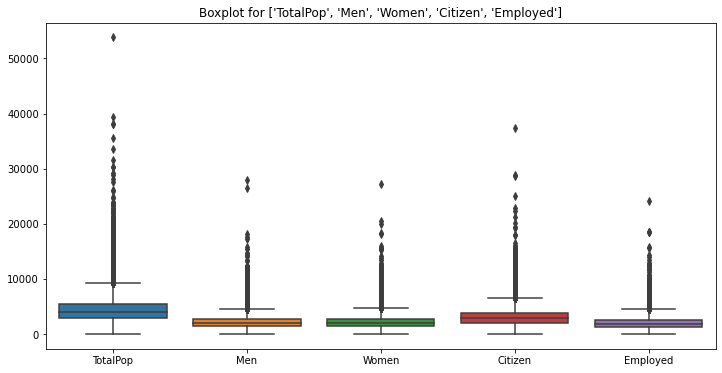

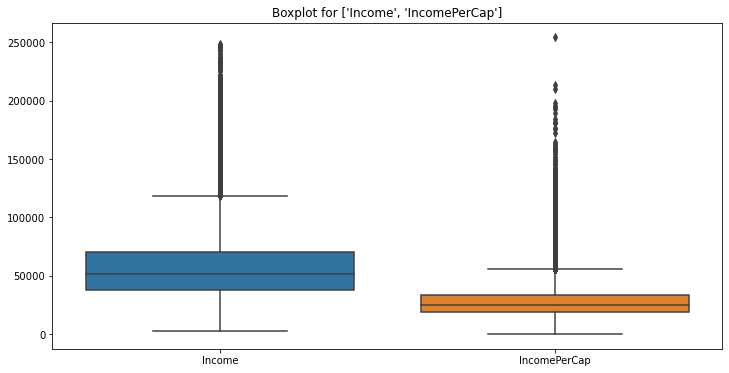

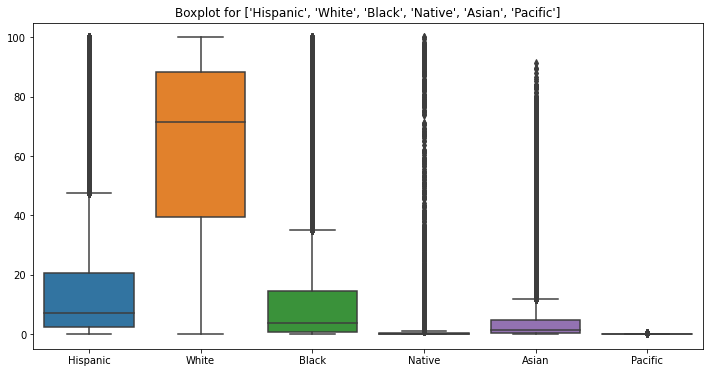

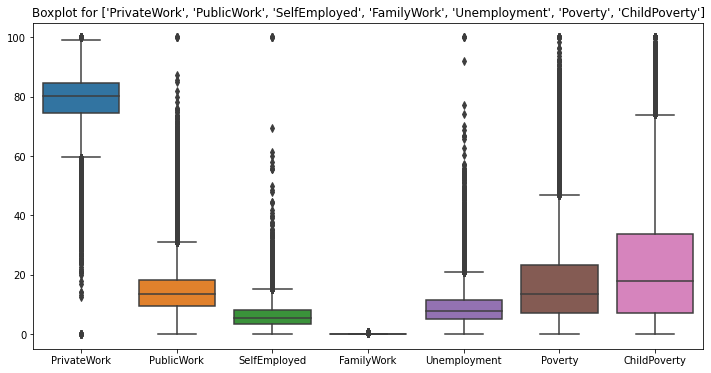

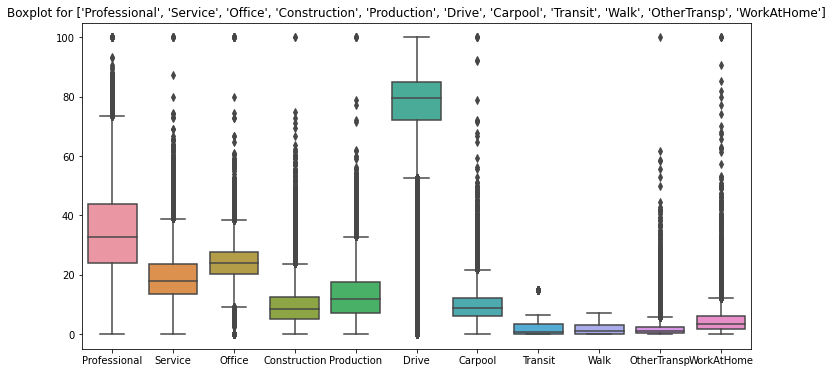

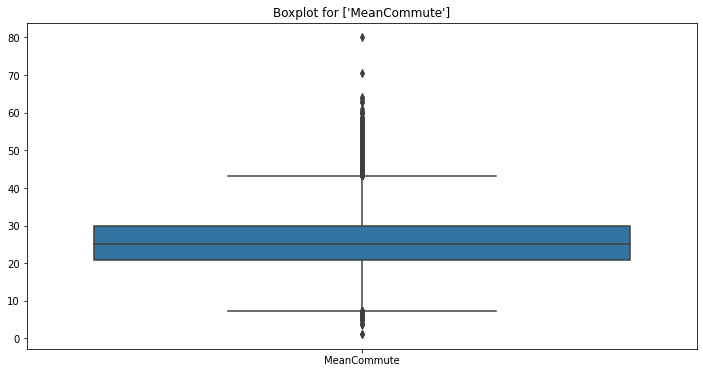

In [9]:
# creating a boxplot for each grouping
for group in groupings:
    plt.figure(figsize=(12,6))
    ax = sns.boxplot(data=df[group])
    plt.title(f"Boxplot for {group}")
    plt.show()


There a number of oddities which can be observed.  
These include:
- The min value of TotalPop is 0.
- The min value of certain rows is 0 which is unrealistic.
  - This would imply census tracts with no People in it. -> Unrealistic
- There seem to be NaN Values for nearly every column as the count doesnt always add up to 74001.
- The Maximum of every kind of workfield is 100%

## Handling Missing Values
(In the following task you can assume that every NAN entry in the dataframe is actually a missing value. This can paritally be justified by the fact that pandas did not have problems inferring the "proper" datatypes (e.g., numbers types as string would result in an object column) and your subsequent check of the data types. Therefore, you can use `df.isna()` as a proxy indicator for missing values.)

**e)** Simply filling missing entries is usually not a good idea. Therefore, you should first analyze the quantity of missing values and check for patterns of missing values.

To this end, compute the following statistics on missing values:
1) How many entries does the dataframe have? (To relate this to the number of entries missing)
2) How many missing values do we have?
3) How many rows have at least a single missing value?
4) Count the number of missing values per column.
5) Count the number of missing values per row and aggregate them - i.e., show the number of rows that suffer from x missing values.

What do you observe?

In [10]:
# your code
#1 Number of Entries
print("#1")
df_entries = len(df) * len(df.columns)
print("The number of all entries is %s" % df_entries)

#2 Number of missing values
print("#2")
df_na = df.isna().sum().sum()
print("The number of missing values is %s" % df_na)

#3 Number of Rows with at least a single missing value
print("#3")
df_na_single = df.isna().any(axis = 1).sum()
print("The number of rows with at least a single missing value is %s" % df_na_single)

#4 Count of missing values per column
print("#4")
df_mis_col = df.isna().sum(axis = 0).sort_values(ascending = False)
print(df_mis_col)

#5 Missing values per row
print("#5")
df_row = df.isna().sum(axis = 1)
df_row_agg = [[elem, df_row.value_counts()[elem]] for elem in set(np.unique(df_row))]

for element in df_row_agg:  
    print("There are %s rows with %s missing values." % (str(element[1]).ljust(5), str(element[0]).ljust(3)))

#1
The number of all entries is 2516034
#2
The number of missing values is 22469
#3
The number of rows with at least a single missing value is 2008
#4
ChildPoverty    1118
Income          1100
MeanCommute      949
Poverty          835
Service          807
FamilyWork       807
SelfEmployed     807
PublicWork       807
PrivateWork      807
Production       807
Construction     807
Office           807
Professional     807
Unemployment     802
Walk             797
Drive            797
WorkAtHome       797
OtherTransp      797
Transit          797
Carpool          797
IncomePerCap     740
Black            690
Native           690
Asian            690
Pacific          690
White            690
Hispanic         690
Men              379
Women            361
Citizen            0
County             0
Employed           0
TotalPop           0
State              0
dtype: int64
#5
There are 71993 rows with 0   missing values.
There are 982   rows with 1   missing values.
There are 91    rows with 2

Answer:

According to #4 all work related information contain the same amount of missing values (807 for Service, FamilyWork, SelfEmployed, PublicWork, PrivateWork, Production, Construction, Office, Professional) which suggests that all work related information is either all given at once or not at all. <br>
Furthermore it is possible to observe that there are many rows with many missing information (690 rows with 27 missing values). This is problematic as these rows don't hold any kind of information in other columns that could help impute  the missing values. 


**f)** We decide to **remove all rows from `df` where the total population is zero**. \
Given the preceding results, how do you evaluate this strategy? Try to motivate your argumentation by additional short analysis results (see hint for an inspiration).

*Hint: It might be interesting to have a look at the rows with zero population. Afterwards, you can provide some analysis results that show that your (potential) observation generalizes to all rows with zero population.*

In [11]:
# your code
#Droping all rows where the population is zero
df_pop_zero = df[df['TotalPop'] == 0.0]
print("The number of rows with not Total Population Information is %s" % len(df_pop_zero))
df = df.drop(df_pop_zero.index, axis = 0)


#Analysis on how many NaN values are in a row where the population is zero
df_row = df_pop_zero.isna().sum(axis = 1)
df_row_agg = [[elem, df_row.value_counts()[elem]] for elem in set(np.unique(df_row))]

for element in df_row_agg:  
    print("There are %s rows with %s missing values." % (str(element[1]), str(element[0])))


The number of rows with not Total Population Information is 690
There are 690 rows with 27 missing values.


Answer: 

It is very useful to drop all rows with population 0 as that value doesn't make any sense for the appropriate entry as there is no State and County with no population. Therefore on an analytical basis, it is advised to drop these rows.<br>
Furthermore one can see in the codes output that there are 26 further missing entries as soon as there's no population information. This makes these rows unusable with entries in only 8 of the original 34 columns which makes them worth dropping.


## Imputing Missing Values

**g)** The previous analysis showed that there are missing values in the 'Men' and 'Women' columns.\
How would you impute these values? \
Motivate your approach and apply it to `df`.

*Hint: Do not forget about the semantics of the columns.*

In [12]:
print("Missing Men Values account to %s, whereas missing women values account to %s, which in total is %s." % (df["Men"].isna().sum(), df["Women"].isna().sum(), df["Men"].isna().sum() + df["Women"].isna().sum() ))
print("Number of NaNs where information of the quantity of the other gender is known: %s" % len(df[(df["Men"].isna()) | (df["Women"].isna())]))
print("This is very convenient, as it is the sum of the missing men and women values. \nThis means that the Missing NaN Values can be replaced by calculating the difference between the total population and the amount of people of the opposite gender:")
print("Number of Women = Total Population - Number of Men")
print("Number of Men = Total Population - Number of Women")

df["Men"] = df["Men"].fillna(df["TotalPop"] - df["Women"])
df["Women"] = df["Women"].fillna(df["TotalPop"] - df["Men"])

Missing Men Values account to 379, whereas missing women values account to 361, which in total is 740.
Number of NaNs where information of the quantity of the other gender is known: 740
This is very convenient, as it is the sum of the missing men and women values. 
This means that the Missing NaN Values can be replaced by calculating the difference between the total population and the amount of people of the opposite gender:
Number of Women = Total Population - Number of Men
Number of Men = Total Population - Number of Women


In [13]:
assert df[['Men', 'Women']].isna().sum().sum() == 0

**h)** Finally, impute the remaining missing values in `df` using the knn-imputation method.

1) Before you impute the remaining missing values, you should improve the data semantics consistency by turning the columns 
    
        ['Men', 'Women', 'Citizen', 'Employed']
    
    into percentage scores as well. To this end, divide these values by the total population (i.e., 'TotalPop')

In [14]:
# your code
columns =  ['Men', 'Women', 'Citizen', 'Employed']

for column in columns:
    df[column] = df[column]/df["TotalPop"]

2) Impute the missing values using the knn-imputation method.
    To this end, apply the following steps:
        1) Create a working copy `df_tmp` of your dataframe.
        2) Drop the columns `['State', 'County']` from `df_tmp`. On the one hand, this makes the following steps easier because we only have to deal with numerical columns; on the other hand, an alternative one-hot encoding is also problematic as this will cause our feature dimensionality to explode!
        3) Normalize the data in `df_tmp` (e.g., Standard score normalization). If the features have very different scales, even though we are mostly using percentages, knn can become very biased.
        4) Impute the missing values considering five neighbors.
        5) Invert the transformation applied upfront to enable more meaningful and intuitive visualizations.
        6) Append the columns `['State', 'County']`
 
In the end, `df` should not contain missing values and have columns `['State', 'County']`.

*Hint: Be careful with the indices of your dataframes.*


In [15]:
# your code 1) 2)

df_tmp = df.copy(deep = True)

drop_columns = ['State', 'County']
df_tmp.drop(drop_columns, inplace = True, axis = 1)

In [16]:
# your code 3)
std_scaler = StandardScaler()
std_scaler.fit_transform(df_tmp)

array([[-1.15303869, -0.19808055,  0.19808055, ..., -0.40411316,
        -0.43128084, -0.60930626],
       [-1.05386502, -0.01618697,  0.01618697, ..., -0.03309807,
        -0.43128084,  0.71722076],
       [-0.66670629, -0.68174741,  0.68174741, ...,  1.50043097,
        -0.43128084, -0.47497441],
       ...,
       [-0.99617265, -0.21432952,  0.21432952, ...,  0.80786947,
        -0.43128084,  2.39636887],
       [ 0.42944879,  0.28721223, -0.28721223, ..., -1.22034636,
        -0.43128084,  2.96727923],
       [-0.77493909, -1.28595736,  1.28595736, ...,  0.36265136,
        -0.43128084,  1.85904148]])

In [17]:
# your code 4)
imputer = KNNImputer(n_neighbors = 5)
df_tmp = pd.DataFrame(imputer.fit_transform(df_tmp), columns = df_tmp.columns, index = df_tmp.index)

In [18]:
# your code 5)
#ToDo


In [19]:
# your code 6)
df = pd.concat([df[drop_columns], df_tmp], axis = 1)

In [20]:
assert 'State' in df.columns
assert 'County' in df.columns
assert df.isna().sum().sum() == 0
assert df['Hispanic'].min() > -0.01
assert df['Hispanic'].max() < 101

## Data Integration

**i)** In the final preprocessing step, you should integrate one additional source of data into the preprocessed dataframe `df`. 
As the data has a natural geospatial dimension, you are going to endow each tract with its geographic coordinate.
To this end, load **coordinates.csv**. Integrate the two data sources exploiting the correspondence between 'CensusTract' and 'GEOID'.
Finally, drop the 'USPS' column.

In [21]:
# your code

df_coord = pd.read_csv(r'dataset/coordinates.csv', index_col = "GEOID")

df = pd.concat([df, df_coord], axis = 1)
df.drop("USPS", inplace = True, axis = 1)




In [22]:
assert 'Men' in df.columns
assert 'County' in df.columns
assert 'INTPTLONG' in df.columns
assert 'INTPTLAT' in df.columns

# Q2 - Visualization (15 points)
In this task, you will analyze the data that you preprocessed in question 1 (**census_data.csv**). In particular you will analyze income-related aspects, using different means of visualization.

Start with the following preprocessed and integrated dataframe `df`. \
Note that it has a similar structure to the dataframe that you should obtain from the previous task, however, the values have been modified!

**Library usage:** This notebook imports a couple visualization libraries that have a significat overlap in terms of functionalities. Therefore, you are free to use any of these libraries (and those in the environment in general) to implement the following questions as long as your resulting plot compilies with the explicitly mentioned requirements.

In [23]:
df = pd.read_pickle('dataset/df_vis.pkl')

**a)** Visualize two histograms for 'Income' and 'IncomePerCap' in a **single plot**. Compare the two distributions; what do you observe?

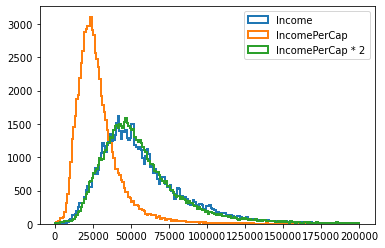

In [24]:
# your code
# create bins in order to better visualize both histograms
bins = np.linspace(0, 200000, 200)

kwargs = {"bins": bins, "alpha": 1, "histtype": "step", "linewidth": 2}

plt.hist(df["Income"], label="Income", **kwargs)
plt.hist(df["IncomePerCap"], label="IncomePerCap", **kwargs)
plt.hist(df["IncomePerCap"] * 2, label="IncomePerCap * 2", **kwargs)
plt.legend(loc="upper right")
plt.show()


Answer:

- general Income is more widely distributed than Income per Capita, as it has a wider variety of values that range from 10.000 to about 130.000. This is though connected to fewer occurence of these values.
- As max occurence for a value of roughly 25.000 for income per capita with nearly 3.000 occurences, the max number of similar values in Income is 1500 at an income of 50.000.
- We can observe that the Income distribution closely mimics the double of the Income per Capita suggesting that each household comprises of two working adults.


## Aggregation for Visualization Pruposes
**b)** As the data contains too many rows for per-row visualizations, you should aggregate the data further before creating more interesting visualizations.
The following function will do the job for your; however, why didn't we simply run `groupby(...).mean()` to get the results for the columns
specified in `l_col`?

In [25]:
def my_aggregation(df):
    l_col = ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income', 'IncomePerCap', 
             'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 
             'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 
             'FamilyWork', 'Unemployment', 'INTPTLAT', 'INTPTLONG']
    df_tmp = df.copy()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].mul(df_tmp['TotalPop'], axis=0)
    df_tmp = df_tmp.groupby(['State', 'County'], observed=True).sum()
    df_tmp.loc[idx[:, l_col]] = df_tmp.loc[idx[:, l_col]].div(df_tmp['TotalPop'], axis=0)
    
    return df_tmp


In [26]:
df = my_aggregation(df)


# To Do Markdown

**c)** Next, you should create an overview over column correlations particularly consideirng high/medium/and low incomes.

1) Create a copy `df_plot` of the aggregated dataframe.

In [27]:
# your code
df_plot = df.copy()

2) Append a column 'IncomeClass' to `df_plot` containing the 'Income' categories based on the following inter-percentile ranges:
    - low' iff the income is less than the 33% income percentile
    - 'medium' if the income is between the 33% and 66% percentile, and 
    - 'high' iff the income is above the 66% percentile

In [28]:
categories = ['low', 'medium', 'high']

#Categorise Income based upon the ranges (percentiles) and add category to the Dataframe
df_plot['IncomeClass'] = pd.qcut(df['Income'], q=3, labels=categories)

3) Project the dataframe on the columns that contain percent values (for the sake of readability), that is:

        ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production',
        'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
        'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
        'FamilyWork', 'Unemployment', 'IncomeClass']
        

In [29]:
# your code
columns = ['Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Poverty', 'ChildPoverty', 
        'Professional', 'Service', 'Office', 'Construction', 'Production',
        'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
        'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
        'FamilyWork', 'Unemployment', 'IncomeClass']
df_plot_copy = df_plot[columns].copy()


4) Create a parallel coordinates diagram that uses the 'IncomeClass' for coloring the lines. Rotate the x-axis labels by 90° to make them easier to read.
Briefly discuss your results. Do you observe any correlations? Please explain.
    

C:\Users\duden\Anaconda3\envs\IDS2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


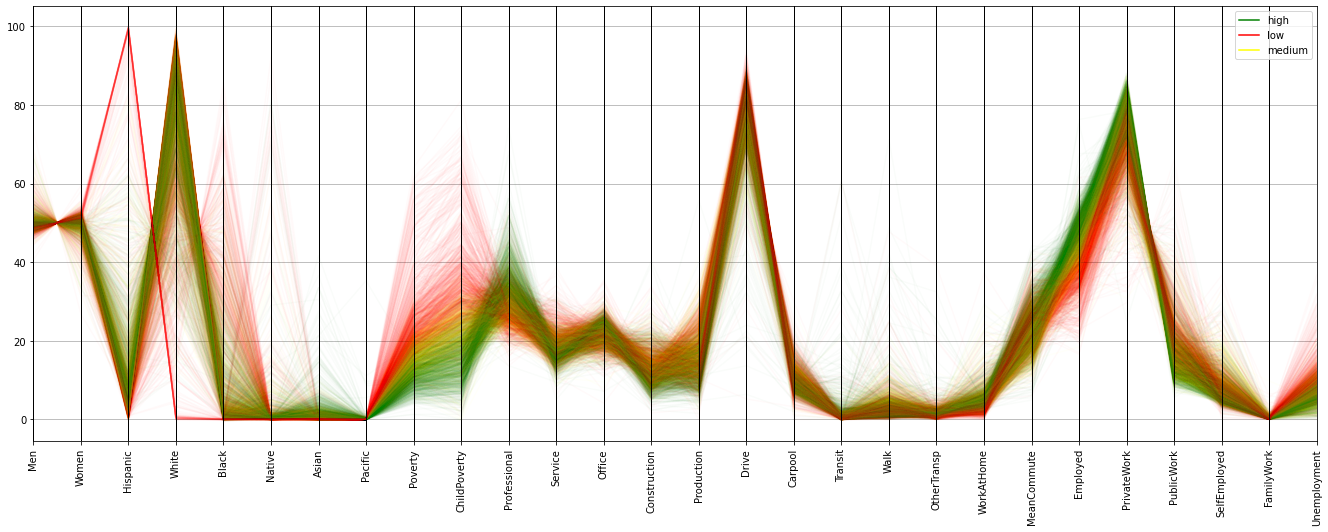

In [30]:
# your code
fig = plt.figure(figsize = (23,8))
pd.plotting.parallel_coordinates(df_plot_copy, 'IncomeClass', color = ['green', 'red', 'yellow'], alpha = 0.02)
plt.xticks(rotation = 90)

legends = plt.legend()

for lh in legends.legendHandles: 
    lh.set_alpha(1)

plt.show()

Answer:

- Counties within the high income brackets tend to comprise of a mostly White, Asian and/or Native population.
- Counties within the low income bracket tend to comprise of a higher percentage of Black and Hispanic ethnicities as well as nearly no White, Native and/or Asian population.
  
- People within counties within the low income bracket tend to have a higher propability of poverty and vice versa. 

- There is a trend noticable concerning sex. The high income stream starts at roughly 50/50 for a male and female distribution but only carries on for a higher percentage of a male population. 

- There exists a Positive correlation between Poverty and Child poverty
  - The more People are in poverty the more children will be in poverty.
- There exists a Negative correlation between Poverty and Professional Work
  - This can be explained by the generally higher income bracket of people workin within professional jobs.
  - This leads to a smaller propability of Poverty.

- There are only a few income streams for a higher self employment rate, but it can be noticed, that all of them are in the high income bracket, which leads to the conclusion that more self employed people tend to make more money. 

- Higher income leads to a higher percentage of Office jobs, whereas Construction work as well as Production have lower income streams, the higher for its fraction.


## Advanced Visualization: Map

**d)** In this task, you are going to create an advanced visualization that exploits the geospatial nature of the data, that is, you will project the average 'Income' of each county and its population onto a map of the USA. \
You can use the following code to create a suitable map extend.

    ax.set_extent([-125, -66.5, 20, 50], ...)
        
Given this instance, plot one marker (e.g., circular marker) for each row in our aggregated dataset onto the map.
The color encoding should show the average 'Income' of the corresponding county, while the size should be chosen according to its population ('TotalPop'). If you want to modify the dataframe, create a **working copy** beforehand.

What do you observe?


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


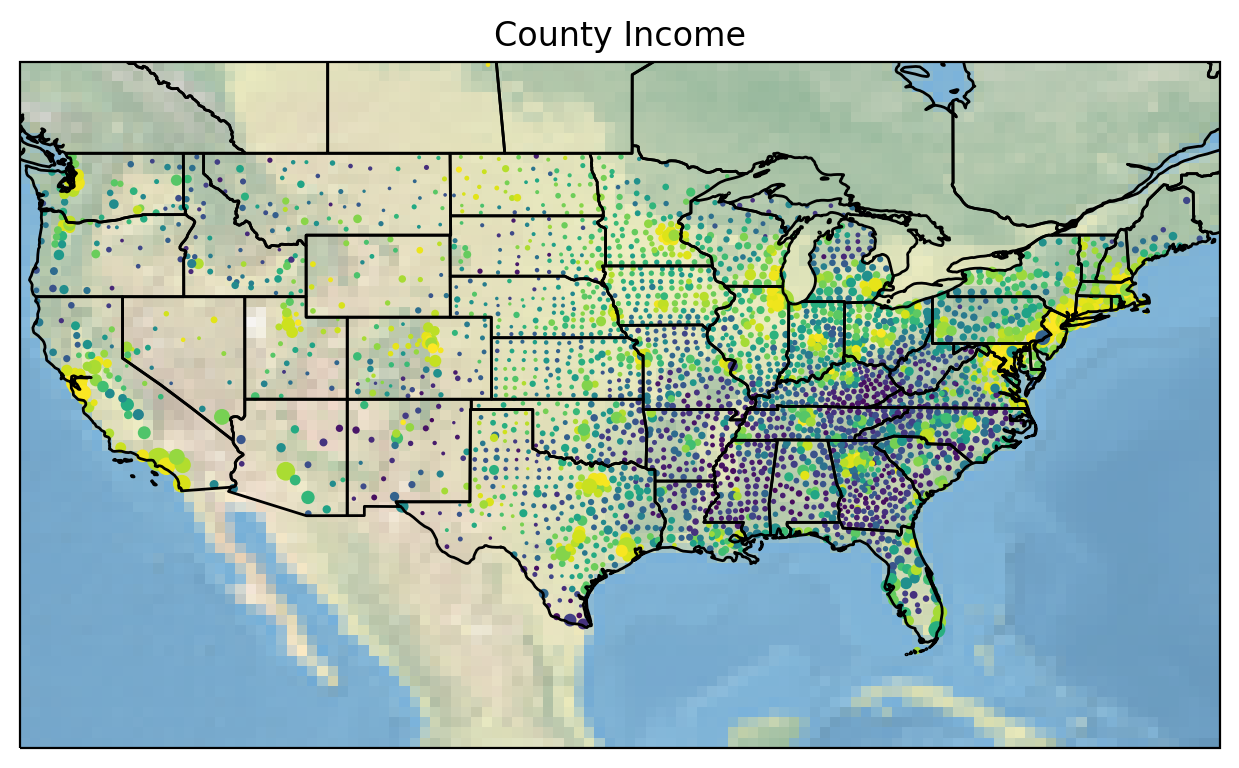

In [31]:
# your code
from warnings import filterwarnings

filterwarnings("ignore")

fig = plt.figure(dpi=200)

# create image of USA
ax = plt.axes([0, 0, 1, 1], projection=ccrs.PlateCarree())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

ax.stock_img()
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor="black")
ax.add_feature(cfeature.STATES, edgecolor="black")

# ranks the Income per County. This is used for the colorcoordination in the plot.
# Highly unlinear, maybe use a different method ? 
color = df_plot["Income"].rank()

# use the Root to get the Accurate scaled size of the counties
size = 1 + 7 * (df_plot["TotalPop"] / df_plot["TotalPop"].mean())**(0.5)

# Scatter plot of all income categories. Counties are displayed within the map.
ax = sns.scatterplot(   
    x="INTPTLONG",
    y="INTPTLAT",
    c= color,
    s = size,
    ec = None,
    cmap="viridis",
    data=df_plot,
    transform=ccrs.PlateCarree(),
)

plt.legend().remove()

ax.set_title("County Income")
plt.show()


Answer:

- States in the Northeast and on the West Coast tend to have greater income capacity, whereas states in the South generally have less.
- Very few and only very small counties in the West of America, crowded areas of cities are in the East of America. The further the West the more counties.
- Cluster of low earning brackets in the lower East of America but just before the East Coast. 
- There is a regional collective of high income counties on the northern East Coast reaching from Maine to Washington D.C., containing cities like New York City, Philadelphia, Baltimore, Boston as well as  Portland. 
- Only fewer and over the West Coast scattered high income bracket counties. These include Portland, Seattle, San Francisco, San José, Los Angeles and San Diego.
- Highest earning counties are usually the biggest (which is quite intuitive). It can be observed that the biggest and well known cities are represented as one would expect, big in size and high in income.
- Northern Part of America are usually smaller counties but mid in income size, whith some exceptions of some larger and higher income counties.
- South Eastern States have the lowest income stream, starting from Texas with some exceptions to this rule with bigger counties including cities like Dallas and Houston, reaching over to North Carolina.

# Q3 - Frequent Itemsets and Association Rules (12 points)


## Frequent Itemsets

**a)** Carry out some preprocessing steps before starting the analysis:

1) Load the `customer_data.csv`.

2) Select 90% of the `customer_data` dataset by random sampling. Use the matriculation number of one of the group members as seed.

3) After completing this preprocessing step, export your final dataset as `customer_data_2.csv` and use it for the next steps of the assignment.

In [32]:
# your code
df = pd.read_csv(r'dataset/customer_data.csv')
df_sampled = df.sample(frac=0.9, random_state=436940)
df_sampled.to_csv('dataset/customer_data_2.csv')


**b)** In this part, we want to get to know our customers by looking at the typical shared characteristics (e.g. "Married customers in their 40s like wine"). This would correspond to the itemset {Married, 40s, Wine}. 

1) Create a new dataframe called `customer_data_onehot` such that rows correspond to customers (as in the original data set) and columns correspond to the categories of each of the ten categorical attributes in the data. The new dataframe should only contain boolean values (True/False or 0/1s) such that the value in row $i$ and column $j$ is True (or 1) if and only if the attribute value corresponding to the column $j$ holds for the customer corresponding to row $i$. Display the dataframe.

*Hint: For example, for the attribute "Education" there are 5 possible categories: 'Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'. Therefore, the new dataframe must contain one column for each of those attribute values.* 

In [33]:
customer_data_onehot = pd.get_dummies(df_sampled).astype(bool)
customer_data_onehot.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_70s,Age_Group_80s,Income_Class_High,Income_Class_Low,Income_Class_Medium,Children_Children,Children_No Children,Wine_Preference_No Wine,Wine_Preference_Wine,Fruit_Preference_Fruits,Fruit_Preference_No Fruits,Meat_Preference_Meat,Meat_Preference_No Meat,Sweets_Preference_No Sweets,Sweets_Preference_Sweets,Purchase_Place_Store,Purchase_Place_Web
221,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False
1409,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False
616,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,True,False,False,True,True,False,True,False,False,True
2013,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,True,False,True,False,False,True,False,True
1040,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,True,False,True,True,False,True,False


2) Use the apriori algorithm to find the frequent itemsets with **min_support = 0.3** from the `customer_data_onehot` dataframe. Show the frequent itemsets that contain at least **3** items.

*Hint: The apriori algorithm of mlxtend needs a dataframe containing only boolean values as input.*

In [34]:
def cull_set(df:pd.DataFrame,k:int):
    return df[df.itemsets.apply(len) == k]

frequent_itemsets = apriori(customer_data_onehot, min_support = 0.3, use_colnames = True)

L3 = cull_set(frequent_itemsets, 3)

L3.head()

,support,itemsets
53,0.309428,"(Fruit_Preference_Fruits, Income_Class_High, Wine_Preference_Wine)"
54,0.348546,"(Meat_Preference_Meat, Income_Class_High, Wine_Preference_Wine)"
55,0.307422,"(Income_Class_High, Wine_Preference_Wine, Sweets_Preference_Sweets)"
56,0.307422,"(Meat_Preference_Meat, Fruit_Preference_Fruits, Income_Class_High)"
57,0.306921,"(Meat_Preference_Meat, Income_Class_High, Sweets_Preference_Sweets)"


**c)** In the following we will investigate the effect of using the apriori property when determining the candidates for the frequent itemsets.

1) Implement the following join- and prune steps of the Apriori algorithm: \
   **join function:** a function that, given the frequent itemsets of size k, generates and yields a list of itemsets of size k+1. Only itemsets that share exactly k elements should be merged. \
   **prune function:** Given the set of candidate itemsets of size k+1 and the set of frequent itemsets of size k, remove the candidate sets that contain an infrequent subset of size k and return the rest.

In [35]:
def apriori_join(L_K):
    
    candidates = set()
    
    # can be improved, currently checking every set twice, set_A against set_B and set_B against set_A
    for set_A in L_K.itemsets:
        
        for set_B in L_K.itemsets:

            # if the sets are different by one element, the union is a candidate
            if (len(set_A.symmetric_difference(set_B))) == 2:
                candidates.add(set_A.union(set_B))
                
    return candidates

In [36]:
def apriori_prune(candidates,L_K):
    
    # create an empty set to store the pruned candidates
    pruned_candidates = set()

    #Check every candidate set if all its subsets are in L_K ( Frequent )
    for candidate in candidates:
        
        # Default initial value is True, if any subset is not in L_K, set it to False
        every_subset_is_frequent = True
        
        # Remove an item from the candidate set and check if the subset is in L_K (is Frequent)
        for item in candidate:
            
            # Remove a single item and create a subset
            subset = set(candidate).copy()
            subset.remove(item)
            
            # if the subset is not frequent ( a subset of the L_K ), break the loop and set the flag to false
            if not is_subset(subset,L_K.itemsets):
                every_subset_is_frequent = False
                break
        
        # if all subsets are frequent, add the candidate to the pruned candidates
        if every_subset_is_frequent:
            pruned_candidates.add(candidate)
            
    return pruned_candidates

def is_subset(subset,superset):
    is_subset  = False
    
    for set in superset:
        # When a subset is found break out of the loop
        if subset == set:
            is_subset = True
            break
        
    return is_subset


2) To see the effect of the apriori property, compare the number of candidate itemsets of size 4 obtained with and without pruning from the itemsets of size three for different values for min_support. To this end, generate a list of tuples *(min_sup, C4_size, C4_size_pruned, L4_size)* as follows:

For $\textrm{min_support} \in [0.1,0.2,...,0.8,0.9,1]$, repeat:

1. Obtain all frequent itemsets of size three using the apriori algorithm.

2. Using the result from 1., generate all itemsets of size four by applying your **join function** $\rightarrow$ C4_size.

3. Prune the result from 2. using your **prune function** $\rightarrow$ C4_size_pruned.

4. Compute the frequent itemsets of size four by using the apriori algorithm $\rightarrow$ L4_size.

In [37]:
def cull_set(df:pd.DataFrame,k:int):
    return df[df.itemsets.apply(len) == k]

def obtain_stats(min_sup,dataset):

    frequent_itemsets = apriori(dataset, min_support = min_sup, use_colnames = True)
    
    # 1. Generate L3
    L3 = cull_set(frequent_itemsets, 3)

    
    # 2. Generate C3 unpruned
    C4_size = apriori_join(L3)

    # 3. Prune C3
    C4_size_pruned = apriori_prune(C4_size,L3)

    # 4.
    L4_size = cull_set(frequent_itemsets, 4)
    
    return (min_sup, len(C4_size), len(C4_size_pruned), len(L4_size.itemsets))

3) Plot the number of candidate sets with and without pruning and the number of frequent itemsets of size four against the corresponding min_sup value. Interpret the plot.

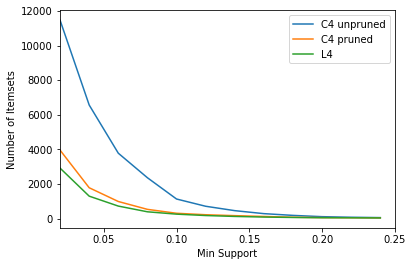

In [38]:
min_sup_values = np.arange(0.02,0.25,0.02)

stats = []

for sup in min_sup_values:
    stats.append(obtain_stats(sup,customer_data_onehot))
    
plt.plot(min_sup_values, [x[1] for x in stats], label = "C4 unpruned")
plt.plot(min_sup_values, [x[2] for x in stats], label = "C4 pruned")
plt.plot(min_sup_values, [x[3] for x in stats], label = "L4")
plt.legend()
plt.xlim(0.02,0.25)
plt.xlabel("Min Support")
plt.ylabel("Number of Itemsets")
plt.show()

## Discussion

The Unpruned Candidate Set for 4 items is about 3 times bigger than the Pruned set.  
The pruning step saves a lot of time by quickly determining if all the subsets are frequent of the Candidate set.  
This is obviously faster than going through the entire dataset again to check if a given Candiate set is Frequent.  
  
After Pruning the the number of sets we need to check is quite low when compared to the actual amount of frequent L4 sets.

d) Use the FP-Growth algorithm to obtain all frequent itemsets with **min_support = 0.3** from `customer_data_onehot`.

In [39]:
# generating the frequent itemsets with the FP-Growth algorithm
fp_frequent_itemsets = fpgrowth(customer_data_onehot, min_support = 0.3, use_colnames = True)

## Association Rules

**d)** In the following, you should generate association rules from the frequent itemsets.

1) Using only the frequent itemsets with min_support=0.3, generate different association rules using minimum confidence equal to 0.6 as a metric. Show the association rules.

In [40]:
assoc_rules = arule(fp_frequent_itemsets, metric = 'confidence', min_threshold = 0.6)
assoc_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Children_Children),(Purchase_Place_Store),0.717653,0.699599,0.477432,0.665269,0.950929,-0.024637,0.897441
1,(Purchase_Place_Store),(Children_Children),0.699599,0.717653,0.477432,0.682437,0.950929,-0.024637,0.889106
2,(Children_Children),(Fruit_Preference_No Fruits),0.717653,0.546640,0.484453,0.675052,1.234912,0.092156,1.395179
3,(Fruit_Preference_No Fruits),(Children_Children),0.546640,0.717653,0.484453,0.886239,1.234912,0.092156,2.481922
4,(Fruit_Preference_No Fruits),(Purchase_Place_Store),0.546640,0.699599,0.383149,0.700917,1.001885,0.000721,1.004409


2) From the association rules obtained in task (d) 1), provide the three rules with the highest lift. Comment on them.

In [81]:
assoc_rules.sort_values(by = 'lift', ascending = False).head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
368,"(Meat_Preference_Meat, Income_Class_High)","(Wine_Preference_Wine, Sweets_Preference_Sweets)",0.353059,0.388164,0.303912,0.860795,2.217605,0.166867,4.395226
373,"(Wine_Preference_Wine, Sweets_Preference_Sweets)","(Meat_Preference_Meat, Income_Class_High)",0.388164,0.353059,0.303912,0.782946,2.217605,0.166867,2.980549
347,"(Meat_Preference_Meat, Income_Class_High)","(Fruit_Preference_Fruits, Wine_Preference_Wine)",0.353059,0.391174,0.303912,0.860795,2.200546,0.165804,4.373611


# Discussion

We can see that a High income Class and Meat preference implies that the Person likes sweets and Wine with a confidence of 86%.  
This Rule is bi-directional as people who like sweets and Wine also tend to like meat and are in a high income class with a confidence of 78%.  
This is interesting as the metrics (confidence, support and lift) imply that these combinations tend to always appear together.
  
The Third rule is also particularly interesting as being in a high income class and having a preference for meat implies that the person like Wine and Fruit with a high likelihood of about 86%.  
From this we can draw that people of a high income class with a meat preference tend to really like Wine as it is present in every of the 3 top rules.  


# Q4 - Text Mining (15 points)
In this question, you will use the scripts of some Harry Potter movies. First, you will try to predict the character given a line in the script. Afterwards, using N-grams, you will generate sentences for some of the characters.

**a)** In this part, you will preprocess and reconstruct the data to make it suitable for the following tasks.

1) Load each of the datasets <b>hp_1.csv</b>, <b>hp_2.csv</b>, and <b>hp_3.csv</b> into its own dataframe and show the set of characters (here: a fictional character) appearing in each dataset.

In [42]:
dataframes = []
f_paths = ['dataset/hp_1.csv','dataset/hp_2.csv','dataset/hp_3.csv']

for f_path in f_paths:
    dataframes.append(pd.read_csv(f_path))

for dataframe in dataframes:
    print(sorted(dataframe["Character"].unique()))


['All  ', 'All 3  ', 'Barkeep\xa0Tom', 'Boy', 'Boy  ', 'Class', 'Crowd  ', 'Dean', 'Draco  ', 'Dudley', 'Dumbledore', 'Dumbledore ', 'Dumbledore  ', 'Fat Lady', 'Filch', 'Filch ', 'Filch  ', 'Firenze ', 'Firenze  ', 'Flint', 'Flint  ', 'Flitwick', 'Flitwick  ', 'Fred', 'Fred  ', 'George', 'George  ', 'Ginny', 'Girl', 'Girl  ', 'Goblin', 'Griphook', 'Gryffindors  ', 'Hagrid', 'Hagrid ', 'Hagrid  ', 'Harry', 'Harry ', 'Harry  ', 'Hermione', 'Hermione ', 'Hermione  ', 'Hermoine', 'Lee  Jordan', 'Lee Jordan', 'Madam Hooch', 'Madam Hooch ', 'Malfoy', 'Man', 'Man  ', 'Man in paint', 'McGonagall', 'McGonagall ', 'McGonagall  ', 'Mrs. Weasley', 'Neville', 'Neville  ', 'OIiver  ', 'Oliver ', 'Oliver  ', 'Ollivander', 'Percy', 'Percy  ', 'Petunia', 'Quirrell', 'Quirrell ', 'Quirrell  ', 'Ron', 'Ron ', 'Ron  ', 'Ron   ', 'Ron and Harry', 'Ron and Harry  ', 'Seamus', 'Seamus  ', 'Sir Nicholas', 'Snake', 'Snape', 'Snape ', 'Snape  ', 'Someone', 'Sorting Hat', 'Students', 'Trainmaster', 'Vernon', 'V

2) Merge the three datasets into a single dataframe called `hp_df` that comprises only the lines spoken from one of the four characters *Harry, Hermione, Dumbledore, and Snape*. Your new dataframe must contain two columns: one for the (four) characters and the other for the lines. You can name those columns "Character" and "Sentence" as in the original data. \
    Make sure that `hp_df` contains a single unique spelling for each of the characters. \
    Make sure that `hp_df` includes all lines (here: script lines) of a character even if this character is spelled slightly differently (e.g., Dumbledore or dumbledore) in the original dataset. \
    Show the first few lines of your dataframe.
    
*Hint: Be aware of white space characters!*

In [43]:
for dataframe in dataframes:
    
    #make sure the character column is a string (probably overkill)
    dataframe["Character"] = dataframe["Character"].astype(str)
    
    # make all the characters lowercase
    dataframe["Character"] = dataframe["Character"].apply(lambda x: x.lower())
    
    # make sure to strip out all the whitespace
    dataframe["Character"] = dataframe["Character"].apply(lambda x: x.strip())


In [86]:
# merge the dataframes
characters = ["harry", "hermione","dumbledore","snape"]

# merge the dataframes
hp_df = pd.concat(dataframes,ignore_index=True)

# only keep the characters we care about
hp_df = hp_df[hp_df["Character"].isin(characters)]

hp_df.head(5)


,Character,Sentence
0,dumbledore,"I should've known that you would be here, Professor McGonagall."
3,dumbledore,"I'm afraid so, professor."
4,dumbledore,The good and the bad.
6,dumbledore,Hagrid is bringing him.
8,dumbledore,"Ah, Professor, I would trust Hagrid with my life."


3) Create the `hp_sampled` dataset which includes 90% of the `hp_df` data. Use the matriculation number of one of the group members as seed. Export the sampled dataset. 

In [85]:
hp_sampled = hp_df.sample(frac = 0.9, random_state = 381373)
hp_sampled.to_csv("dataset/hp_sampled.csv",index = False)

**b)** In this part, you are going to train a classifier that, given a line from the script, predicts the character. For each character, the data contains many sentences belonging to that character. Note that sometimes the "Sentence" column in the original dataset contains more than one sentence. The set of sentences for each character should be seen as the set of example documents belonging to that character (the class). Each individual sentence is a single document. The whole corpus consists of all the individual sentences.

1) Create a new dataframe called `hp_processed` from the dataframe `hp_sampled` such that the new dataframe contains again the columns "Character" and "Sentence", but every entry in the "Sentence" column must be a single sentence. Display the shape of the dataframe and compare it to the shape of `hp_sampled`.

In [94]:
# download the needed data if you get an error
nltk.download('punkt',quiet=True)

# Start with an empty list, its not good to "grow" dataframes
hp_processed_array = []

# Do sentence tokenization for each Sentence
for index, row in hp_sampled.iterrows():
    
    current_character = row["Character"]
    
    # Tokenize the sentences (Documents)
    documents = nltk.sent_tokenize(row["Sentence"], language='english')

    # for each sentence (Document), add the character and the sentence to the array
    for document in documents:
        hp_processed_array.append(
            {"Character": current_character, "Sentence": document}
        )

# Create a dataframe from the array
hp_processed = pd.DataFrame(hp_processed_array)

print(f"The shape of hp_sampled is {hp_sampled.shape}")
print(f"The shape of hp_processed is {hp_processed.shape}")
print(f"There are {hp_processed.shape[0] - hp_sampled.shape[0]} new rows in the hp_processed dataframe")

The shape of hp_sampled is (1686, 2)
The shape of hp_processed is (1932, 2)
There are 246 new rows in the hp_processed dataframe


## Discussion

The hp_sampled dataframe seems to have documents comprising of 2 or more scentences.  
This has been rectified by processing the dataframe and splitting these documents into individual scentences.  
There are about 250 new rows in hp_processed dataframe.

2) Split the preprocessed data `hp_processed` into training (80%) and test (20%) data preserving the distribution based on "Character". 

In [47]:
hp_processed_train, hp_processed_test = train_test_split(hp_processed, test_size = 0.2, random_state = 381373)

3) Preprocess the training and test corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal) and obtain a boolean document-term matrix (i.e, each row in the matrix contains only 1s and 0s depending on whether a particular word appears in a sentence or not). Train a logistic classifier on the training corpus with the character as target feature. Use the classifier to predict the character of the sentences in the test corpus and show its accuracy on the test corpus. Comment on the result.

In [ ]:
# Download the Missing Packages
nltk.download("stopwords", quiet=True)
nltk.download("wordnet", quiet=True)

# define the preprocessing function
class Preprocessor:
    def __init__(self):

        # Define the lemmatizer
        self.lemma = WordNetLemmatizer()

        # keep the ' as it is used to detect contractions
        # These will be removed later
        self.whitelist = set("abcdefghijklmnopqrstuvwxyz' ")
        self.stopwords = set(stopwords.words("english"))

        # udate the stopwords set with contractions
        # The tokenizer splits these into separate tokens
        self.stopwords.update(["'s", "n't", "'m", "'re", "'ve", "'ll", "'d"])

    def __call__(self, text):

        # lowercase the text
        lower_text = text.lower()

        # remove punctuation
        without_punctuation = "".join(filter(self.whitelist.__contains__, lower_text))

        # Tokenize the sentences (Documents)
        tokenized = nltk.word_tokenize(without_punctuation, language="english")

        # lemmatize the words and remove stopwords
        lemmatized = [
            self.lemma.lemmatize(word)
            for word in tokenized
            if word not in self.stopwords
        ]

        return lemmatized


In [97]:
# Create the boolear document term matrix
vectorizer = CountVectorizer(tokenizer=Preprocessor(), binary=True, dtype=bool)

# create the y and X train
y_train = hp_processed_train["Character"].copy()
X_train = hp_processed_train["Sentence"].copy()

# Fit the vectorizer and then transform the training data into the document term matrix
X_train = vectorizer.fit_transform(X_train)

# create the y and X test
y_test = hp_processed_test["Character"].copy()
X_test = hp_processed_test["Sentence"].copy()

# Transform the test data into the document term matrix
X_test = vectorizer.transform(X_test)


In [140]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Setting the Baseline 

for strategy in ["stratified", "most_frequent", "uniform"]:

    dummy_clf = DummyClassifier(strategy=strategy)
    dummy_clf.fit(X_train, y_train)
    y_pred = dummy_clf.predict(X_test)
    
    print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  dumbledore       0.17      0.17      0.17        48
       harry       0.52      0.51      0.51       212
    hermione       0.31      0.31      0.31       108
       snape       0.08      0.11      0.09        19

    accuracy                           0.39       387
   macro avg       0.27      0.27      0.27       387
weighted avg       0.40      0.39      0.39       387

              precision    recall  f1-score   support

  dumbledore       0.00      0.00      0.00        48
       harry       0.55      1.00      0.71       212
    hermione       0.00      0.00      0.00       108
       snape       0.00      0.00      0.00        19

    accuracy                           0.55       387
   macro avg       0.14      0.25      0.18       387
weighted avg       0.30      0.55      0.39       387

              precision    recall  f1-score   support

  dumbledore       0.08      0.17      0.11        48
       harry       0.

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define a dictionary of the hyperparameters to search
param_grid = {
    "C": [
        0.001,
        0.01,
        0.1,
        1,
        10,
    ],
    "penalty": [
        "l2",
        "l1"
    ],
}

# define our default classifier
classifier = LogisticRegression(
    max_iter=300,
    class_weight="balanced",
)

# Define the grid search
grid = GridSearchCV(
    classifier,
    param_grid,
    cv=7,
    verbose=0,
    n_jobs=-1,
)

# Fit each of the models
grid.fit(X_train, y_train)

# Extract the best estimator
classifier = grid.best_estimator_
params = grid.best_params_

# predict the test set
y_test_predicted = classifier.predict(X_test)

print(f"Best parameters: {params}")
print(classification_report(y_test, y_test_predicted))

Best parameters: {'C': 1, 'penalty': 'l2'}
              precision    recall  f1-score   support

  dumbledore       0.28      0.29      0.29        48
       harry       0.69      0.71      0.70       212
    hermione       0.46      0.43      0.44       108
       snape       0.32      0.32      0.32        19

    accuracy                           0.56       387
   macro avg       0.44      0.44      0.44       387
weighted avg       0.56      0.56      0.56       387

The strategy uniform has a precision of 0.44 a recall of 0.44 and an f1 score of 0.44


### Discussion

Model is quite good when compared to the baseline models.  
Its outperforming each baseline Dummy classifier in each metric, the F1-Score, the class accuracy as well as the accuracy.  
  
There are a few problems with the class inbalance as snape only has a few words, this has been partly fixed by using automatic class weights.  
This keeps the classifier from favoring harry as his lines are overrepresented in the set.  
We didnt use any sampling methods to remove the class imbalance as this would greatly reduce the dataset size or increase the number of snapes lines too much.  
The model still suffers from clas imbalance as Harry is still favored among the possible classifications.  
  
There are a few problems with contractions such a it'll, he's etc...  
This has been partly fixed as the Tokenizer splits these into it and 'll for example.  
Using 'll and 's etc... as stopwords solved the problem of contractions.  

4) Next, you are going to perform the same predicting task based on doc2vec.

1. Preprocess the training corpus (to lowercase, no punctuation, tokenization, lemmatization, and stopword removal). 
2. Create a doc2vec model to reduce the dimension of the document vector. Choose a vector size 4-8 and ignore all words whose count is lower than 3.
3. Train the doc2vec model on the training data (thus creating an embedding).
4. Use the created embedding to convert the training set to a set of document vectors.
5. Train a logistic classifier on the train data with the character as target feature.
6. Show the accuracy of prediction on the test data and comment on it.

In [149]:
# use the same preprocessor as before
processor = Preprocessor()

# Do some renaming to make it easier to read
X_train_doc2vec = hp_processed_train["Sentence"].copy()
y_train_doc2vec = hp_processed_train["Character"].copy()

X_test_doc2vec = hp_processed_test["Sentence"].copy()
y_test_doc2vec = hp_processed_test["Character"].copy()

In [ ]:
# 1. Preprocess the training and test data
# Each step we use on the training data we need to use on the test data
X_train_processed_doc2vec = [processor(sentence) for sentence in X_train_doc2vec]
X_test_processed_doc2vec = [processor(sentence) for sentence in X_test_doc2vec]

In [170]:
# 2. / 3.

# Convert the data into tagged documents
tagged_documents = [
    TaggedDocument(doc, [i]) for i, doc in enumerate(X_train_processed_doc2vec)
]

# Create the model
model = Doc2Vec(
    vector_size=6,
    min_count=3,
    workers=4,
    epochs=100,
)

# Build the vocabulary
model.build_vocab(tagged_documents)

# train the model
model.train(tagged_documents, total_examples=model.corpus_count, epochs=model.epochs)


In [171]:
# 4. Infer the vectors on the test and train data
X_train_vectors_doc2vec = [model.infer_vector(doc) for doc in X_train_processed_doc2vec]
X_test_vectors_doc2vec = [model.infer_vector(doc) for doc in X_test_processed_doc2vec]

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

param_grid = {
    "C": [
        0.0001,
        0.001,
        0.01,
        0.1,
        1,
        10,
    ],
    "penalty": [
        "l2",
        "l1"
    ],
}

# define our default classifier
classifier_doc2vec = LogisticRegression(
    max_iter=300,
    class_weight="balanced",
)

# Define the grid search
grid = GridSearchCV(
    classifier_doc2vec,
    param_grid,
    cv=7,
    verbose=0,
    n_jobs=-1,
)

# Fit each of the models
grid.fit(X_train_vectors_doc2vec, y_train_doc2vec)

# Extract the best estimator
best_classifier_doc2vec = grid.best_estimator_
params = grid.best_params_

# predict the test set
y_test_predicted_doc2vec = best_classifier_doc2vec.predict(X_test_vectors_doc2vec)

print(f"Best parameters: {params}")
print(classification_report(y_test_doc2vec, y_test_predicted_doc2vec))

Best parameters: {'C': 0.0001, 'penalty': 'l2'}
              precision    recall  f1-score   support

  dumbledore       0.12      0.25      0.17        48
       harry       0.58      0.43      0.50       212
    hermione       0.39      0.23      0.29       108
       snape       0.06      0.21      0.09        19

    accuracy                           0.34       387
   macro avg       0.29      0.28      0.26       387
weighted avg       0.45      0.34      0.38       387



## Discussion

The Regression based on the Doc2Vec model seems to perform worse.

### MORE HYPERPARAMETER TUNING NEEDED

**c)** For the following tasks use the `hp_processed` (the data before splitting into training and test data).

1) For each character, create a list containing all sentences of that character.
    For each character separately, build a bigram language model using MLE. Do not perform stemming and stopword removal for this task, but apply other preprocessing steps such as to lowercase, no punctuation, and tokenization. Use both right and left padding.

In [198]:
whitelist = set("abcdefghijklmnopqrstuvwxyz ")

# extract the lines for each character
# save these in a dictionary
character_lines = hp_processed.groupby("Character")["Sentence"].apply(list).to_dict()

# Preproess the data
# Handle this for each character
for character, corpus in character_lines.items():

    # Start with an empty list, to which we will append the tokenized sentences
    processed_corpus = []

    # Loop over each scentence
    for document in corpus:

        # lowercase
        to_lower = document.lower()

        # remove punctuation, only keep letters in the whitelist
        without_punctuation = "".join(filter(whitelist.__contains__, to_lower))

        # tokenize each sentence into words
        tokenized = nltk.word_tokenize(without_punctuation, language="english")

        # Only append if the tokenized sentence is not empty
        if tokenized != []:
            processed_corpus.append(tokenized)

    # Reassign the processed corpus to the character
    character_lines[character] = processed_corpus

character_bigrams = {}

# create a Bigram model for each character
for character, corpus in character_lines.items():

    # Pad the corpus with a start and end tokens
    # Extract the bigrams
    padded_tuples, vocab = padded_everygram_pipeline(2, corpus)

    # Create the bigram model
    bigram_model = MLE(2)

    # Fit the model
    bigram_model.fit(padded_tuples, vocab)

    # Save the model
    character_bigrams[character] = bigram_model


2) For each character, use the created language model to generate a sentence of ten words. Display the sentences.

In [210]:
# now generate the bigrams for each character
for character, bigram_model in character_bigrams.items():
    print(f"{character} says:")
    print(" ".join(bigram_model.generate(10, text_seed=["<s>"])))
    print("")


dumbledore says:
there is sufficient evidence to your enemies but that no

harry says:
come </s> and you killed him to do it dobby

hermione says:
its also quite dangerous </s> gold and we do realize

snape says:
asphodel and what are potter and even put a goat



3) Build a 4-gram model with the same data as in the previous task. Use both right and left padding.

In [204]:
character_quadgram = {}

# create a Bigram for each character
for character, corpus in character_lines.items():
    padded_tuples, vocab = padded_everygram_pipeline(4, corpus)
    quadgram = MLE(4)
    quadgram.fit(padded_tuples, vocab)
    character_quadgram[character] = quadgram


4) For each character, use the created 4-gram language model to generate a sentence of ten words. Display the sentences.

In [217]:
for character, quadgram in character_quadgram.items():
    print(f"{character} says:")
    print(" ".join(quadgram.generate(10, text_seed=["<s>"])))
    print("")


dumbledore says:
<s> theres been another attack </s> </s> </s> </s> </s>

harry says:
<s> what </s> </s> </s> </s> </s> </s> </s> </s>

hermione says:
<s> <s> but its tricky </s> </s> </s> </s> </s>

snape says:
<s> <s> suffice it to say your professor finds himself



5) Compare the sentences generated by the bigram model with the sentences generated by the 4-gram model.

## Discussion

The scentences generated by the Bigram model are a lot less cohesive when compared to the 4-gram model.  
This is to be expected as the 4-gram model is able to learn and apply a lot more context to the surrounding words and thus generate scentences with more meaning.  
Even if this meaning sometimes does not make any sense.  
  
Furthermore are the generated scentences not always be stopped ending token.  
When the 4-gram model detects an endtoken it will stop to generate any more words, which is to be expected.  
The Bigram model, on the other hand, does not stop and will keep generating words, as it never "Learned" that this token ends a scentence.  
The Padding on both ends is only a single start and endtoken giving no context to stop generating, as there are no 2 end token following each other.  

# Q5 - Process Mining (23 points)

In this task, we consider a simulated process of students that participate in an online course.
The course comprises 6 batches of lecture material as well as a mandatory assignment to be delivered in two parts. (Note that in this process, it is not required to achieve a certain score in the assignment in order to be admitted to the exam.)

While there are strict deadlines for the assignment and the exam, there is only a recommended schedule for the lecture material (i.e., consume material in order).

The system logs for every student, among other activities, when he downloads a certain lecture material batch. 

## Loading the Data and Basic Statistics

**a)** Load the data **log.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - 'Activity' is the activity key
 - 'Student' is the case ID
 - 'Timestamp' is the timestamp

In [56]:
df_log = pd.read_csv("dataset/log.csv", sep = ",")
df_log = pm4py.format_dataframe(df_log, case_id='Student', activity_key='Activity', timestamp_key='Timestamp')
log = log_converter.apply(df_log)

print(f'Number of traces: {len(log)}')

Number of traces: 2000


**b)** Compute the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [57]:
from datetime import datetime

# Number of events
print(f'Number of events: {len(df_log)}')

# number of cases (Students)
print(f'Number of cases: {len(log)}')

# earliest and latest timestamp
earliest_timestamp = list(case_statistics.get_cases_description(log,parameters={"sort_by_index":1,"sort_ascending":True}).items())[0]
latest_timestamp = list(case_statistics.get_cases_description(log,parameters={"sort_by_index":2,"sort_ascending":False}).items())[0]

print(f"The Student {earliest_timestamp[0]} started the earliest at {datetime.utcfromtimestamp(earliest_timestamp[1]['startTime']).strftime('%Y-%m-%d %H:%M:%S')}")
print(f"The Student {latest_timestamp[0]} ended the latest at {datetime.utcfromtimestamp(latest_timestamp[1]['endTime']).strftime('%Y-%m-%d %H:%M:%S')}")

# Number of case variations
print(f'Number of case variations: {len(case_statistics.get_variant_statistics(log))}')

Number of events: 19652
Number of cases: 2000
The Student 346630 started the earliest at 2021-09-15 00:18:18
The Student 343526 ended the latest at 2022-02-20 14:00:00
Number of case variations: 432


**c)** Usually, it is insightful to have a look at the distribution of the variants in terms of how often a certain variant is present in the log.
Therefore, create a **scatter plot** that shows the distribution of the variants as follows:
- x-axis: The variants (in ascending order of their support)
- y-axis: Frequency of the variant in the log (total or relative)

<AxesSubplot:title={'center':'Number of case variations'}, xlabel='Case variation', ylabel='Frequency'>

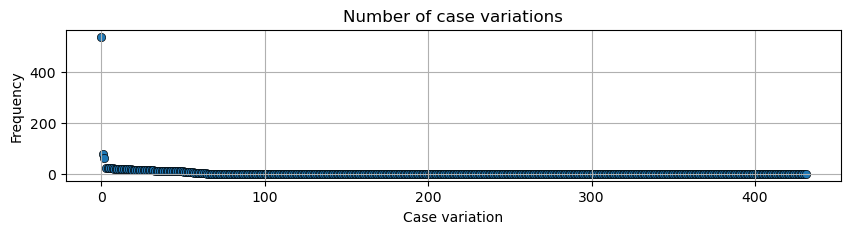

In [58]:
variant_freq = [case["count"] for case in case_statistics.get_variant_statistics(log)]

plt.figure(figsize=(10,2),dpi=100)
plt.title("Number of case variations")
plt.xlabel("Case variation")
plt.ylabel("Frequency")
plt.grid()
sns.scatterplot(x=np.arange(len(variant_freq)), y=variant_freq, ec = "black")

**d)** While the variant distribution shows potential standard process executions in terms of the activity ordering, the distribution of the case durations shows the typical timeframe of cases.
Create a histogram plot over the case durations. For the sake of readability, make sure that the x-axis labels (in this case the case durations) have an easily readable format, that is, your x-axis labels should look like this:
<br></br>
<div>
<img src="templates/caseDurationXAxis.png" width="500"/>
</div>

(array([ 2000000.,  4000000.,  6000000.,  8000000., 10000000., 12000000.,
        14000000., 16000000.]),
 [Text(2000000.0, 0, '23 days, 03:33:20'),
  Text(4000000.0, 0, '46 days, 07:06:40'),
  Text(6000000.0, 0, '69 days, 10:40:00'),
  Text(8000000.0, 0, '92 days, 14:13:20'),
  Text(10000000.0, 0, '115 days, 17:46:40'),
  Text(12000000.0, 0, '138 days, 21:20:00'),
  Text(14000000.0, 0, '162 days, 00:53:20'),
  Text(16000000.0, 0, '185 days, 04:26:40')])

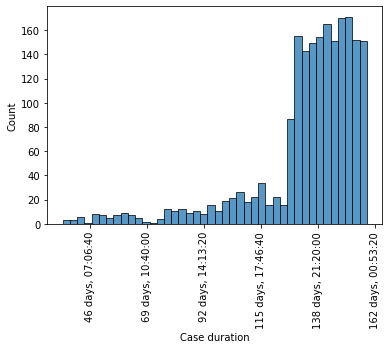

In [59]:
def time_formatter(x:int):
    """Returns a formatted string in form  
    [days] days , [hours]:[minutes]:[seconds]

    Args:
        x (int): The given seconds
    
    Returns:
        str: The formatted string
    """
    hours = int(x // 3600 % 24)
    minutes = int((x % 3600) // 60)
    seconds = int(x % 60)
    
    days = int(x // (3600*24))
    
    return f"{days:d} days, {hours:02d}:{minutes:02d}:{seconds:02d}"
    

# extract all the cases sortet by the duration of the case in ascending order
cases = list(case_statistics.get_cases_description(log,parameters={"sort_by_index":3,"sort_ascending":True}).items())

# extract the duration of each case
case_duration = [case[1]["caseDuration"] for case in cases]

# create a histogram of the case duration
plt.xlabel("Case duration")
plot = sns.histplot(case_duration)

# Extract the labels, format them and set them as the x-axis ticks
xlabels = [time_formatter(x) for x in plot.get_xticks()]
plot.set_xticklabels(xlabels)

# rotate the x-axis labels
plt.xticks(rotation=90)

## Discovery and Conformance Checking
Next, you are going to discover process models for different perspectives on the process. Moreover, you will evaluate how well the process models can represent the behavior present in the log (i.e., the fitness of the models).

### Filtering

**e)** Before discovering models, create three addtional perspectives onto the process by creating three additional event log from the log loaded in a):

1. Log containing only 30% of the most frequent traces (**log_varaint03**)
2. Log containing only 50% of the most frequent traces (**log_varaint05**)
3. Log containing only students that take the exam, that is, cases that end with 'Exam' (**log_exam**)

In [60]:
log_varaint03 = variants_filter.filter_log_variants_percentage(log, percentage=0.3)
log_varaint05 = variants_filter.filter_log_variants_percentage(log, percentage=0.5)

# End activity filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter
log_exam = end_activities_filter.apply(log, ["Exam"])

### Inductive Miner and Replay Fitness

**f)** To get a better understanding of the processes in our four event logs (base log + three additional logs), create processes models using the **Inductive Miner**.
Concretely, for each of the 4 event logs, create two process models using the Inductive Miner with noise threshold **0 and 0.2**. Moreover, to access how well the model presents the logged behavior, apply conformance checking in terms of token-based replay to the model and the log from which it has been mined. Visualize each model as a process tree and as the corresponding Petri net.

In total, your cells should output 8 conformance scores, 8 process trees, and 8 Petri nets (for each log + noise threshold combination). Make sure that it is clear which model and conformance score belongs to log and parameter configuration.

For example, your output can look like this
#### Log: Base
##### IM threshold 0
>Fitness score

>Picture of the process tree

>Picture of the Petri net

##### IM threshold 0.2
>Fitness score

>Picture of the process tree

>Picture of the Petri net

**Describe your results**. How well do the models fit and, in particular, how do the models for
- log_variant05 and log (base log)
- log_variant05 and log_variant03
- log base and log_exam

differ in terms of the behavior that they allow?



--------------- Original Log ---------------

Threshold 0
The Process Tree


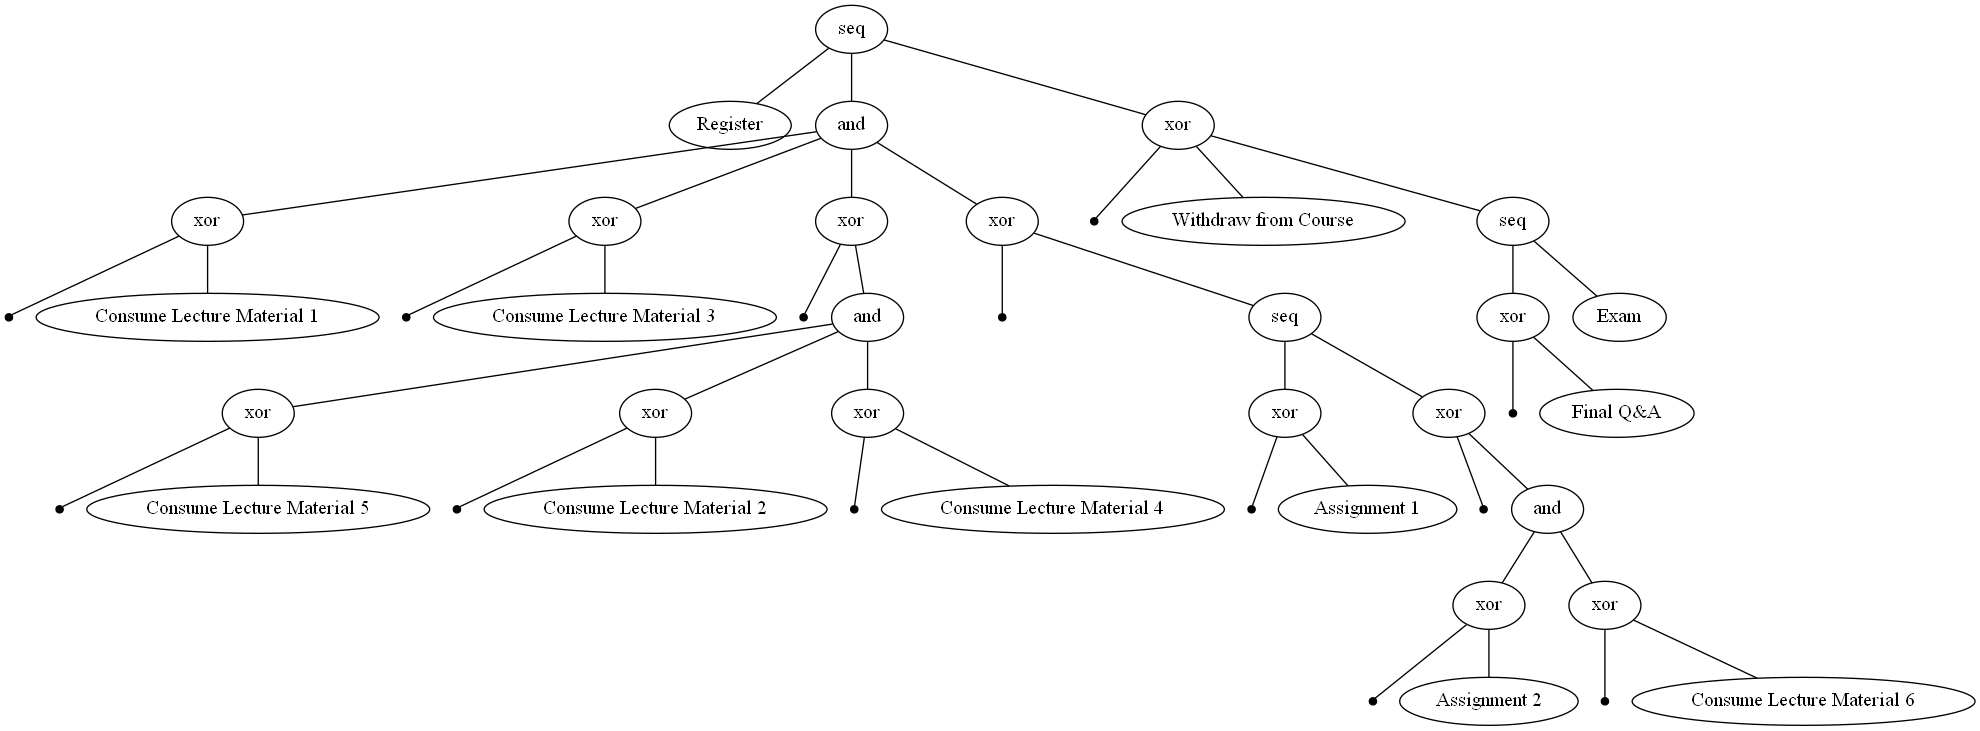

The Petri Net


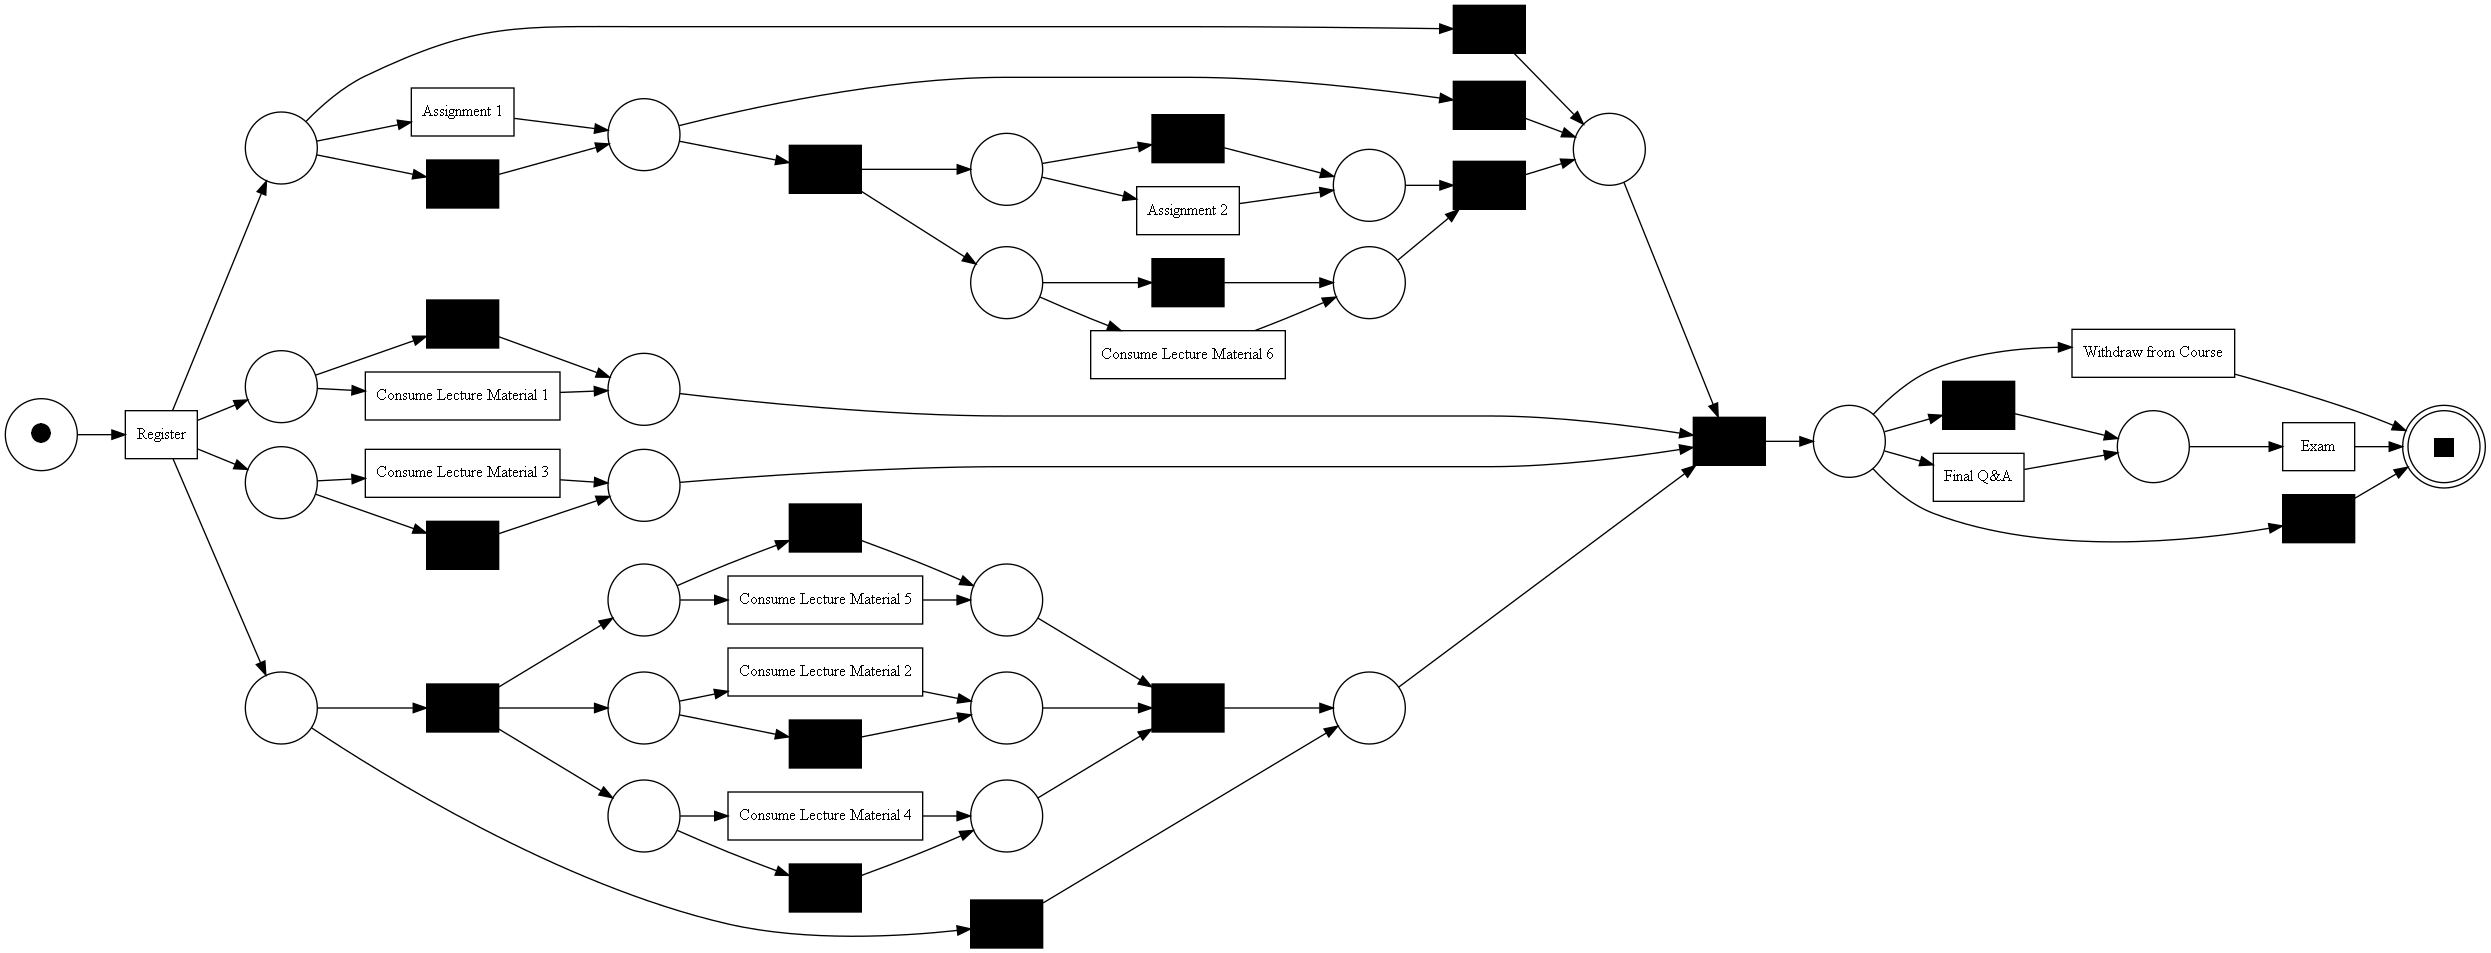

replaying log with TBR, completed variants :: 100%|██████████| 432/432 [00:00<00:00, 771.81it/s]


The Fitness of the Model with no Threshold is 100.00%

Threshold 0.2
The process tree


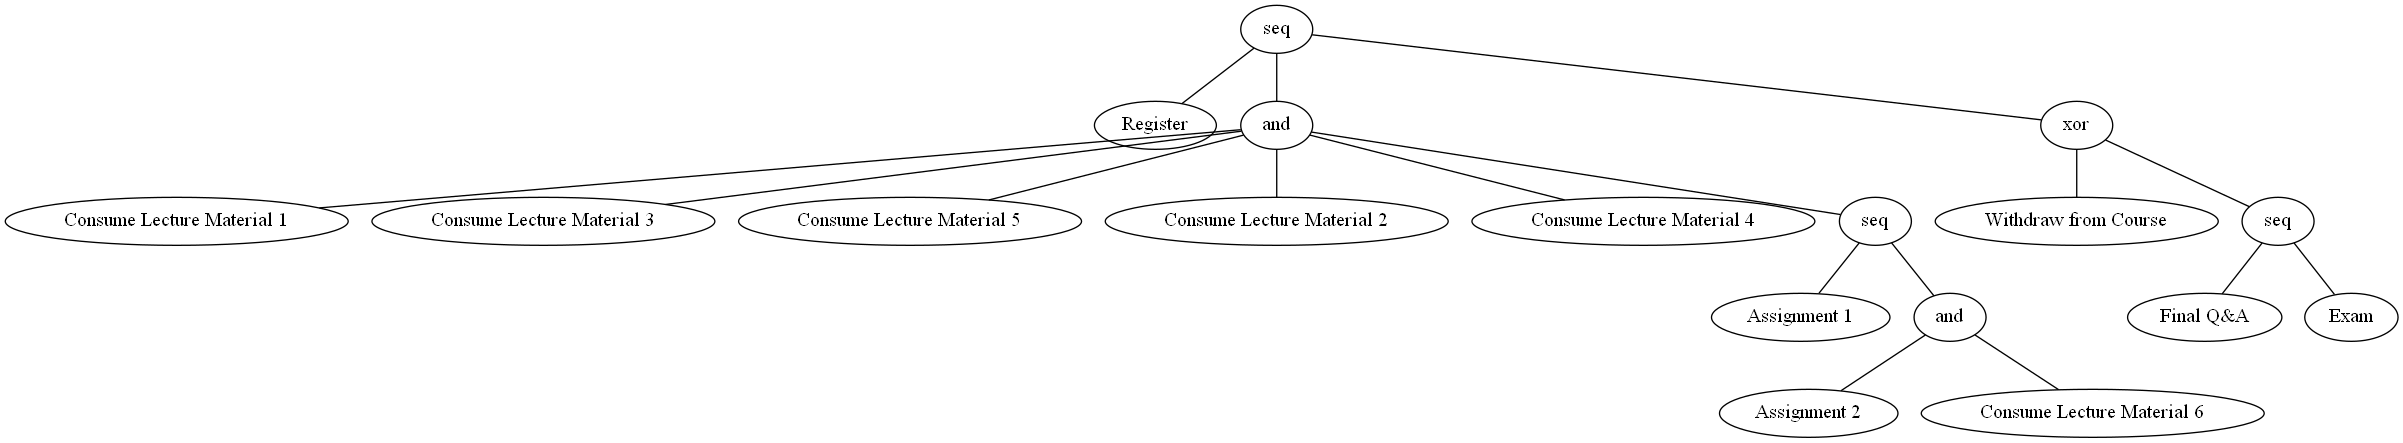

The Petri Net


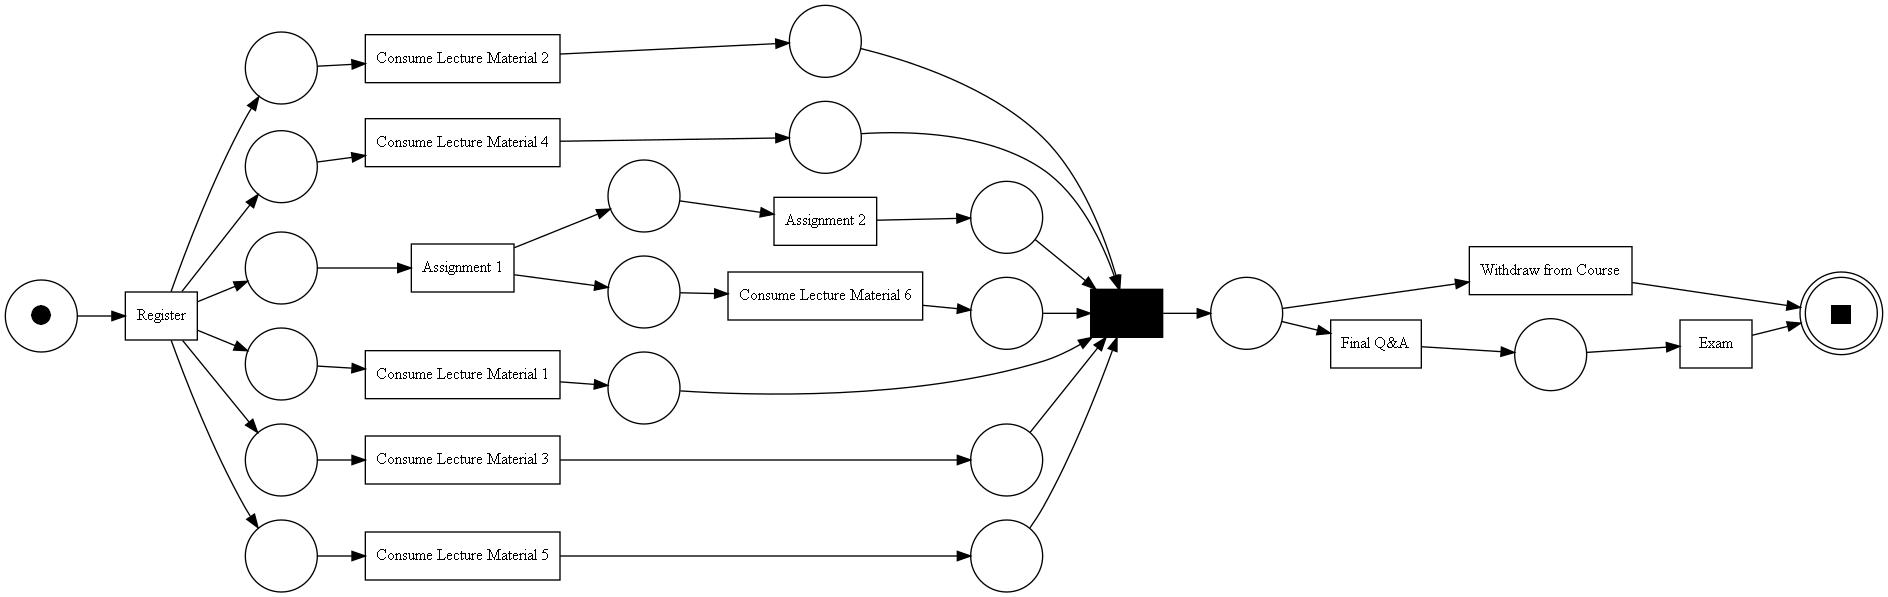

replaying log with TBR, completed variants :: 100%|██████████| 432/432 [00:00<00:00, 1402.28it/s]

The Fitness of the Model is 93.25%


--------------- 0.3 Log ---------------

Threshold 0
The Process Tree


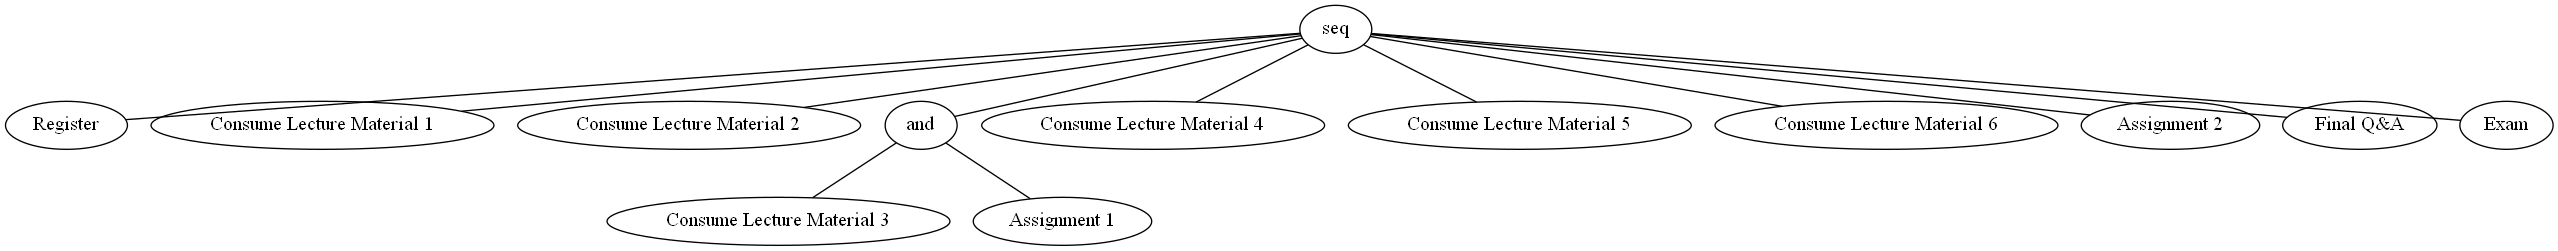

The Petri Net


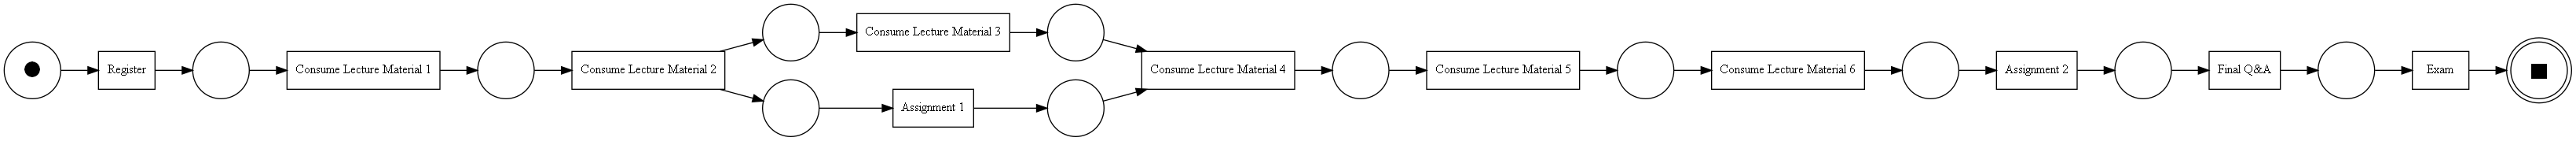

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 359.70it/s]


The Fitness of the Model with no Threshold is 100.00%

Threshold 0.2
The process tree


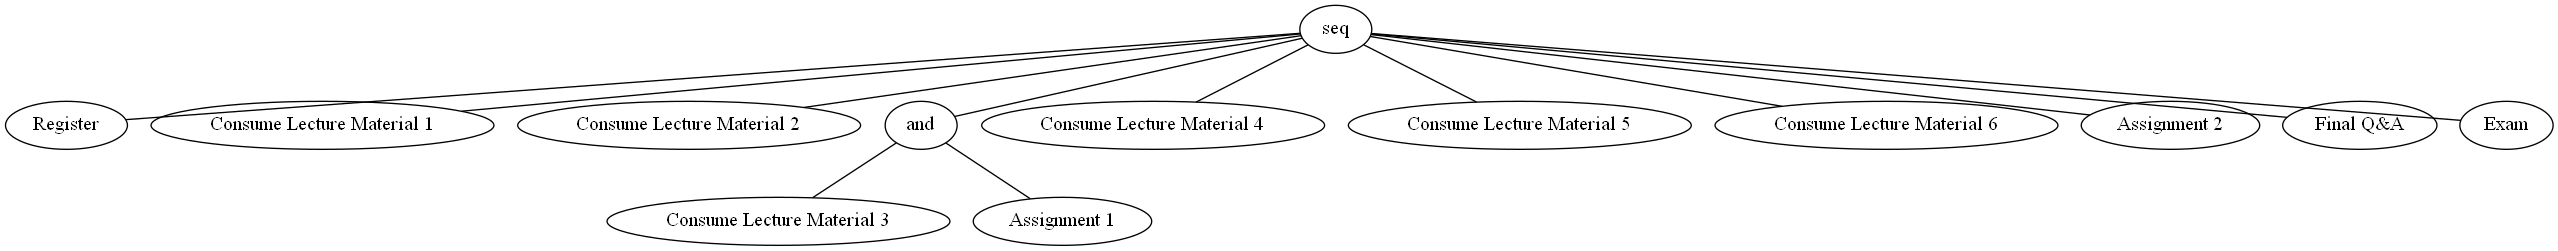

The Petri Net


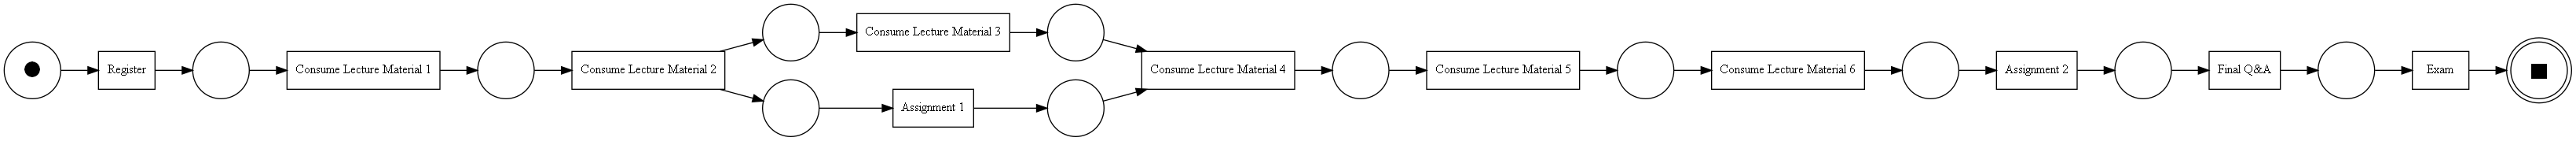

replaying log with TBR, completed variants :: 100%|██████████| 2/2 [00:00<00:00, 396.53it/s]

The Fitness of the Model is 100.00%


--------------- 0.5 Log ---------------

Threshold 0
The Process Tree


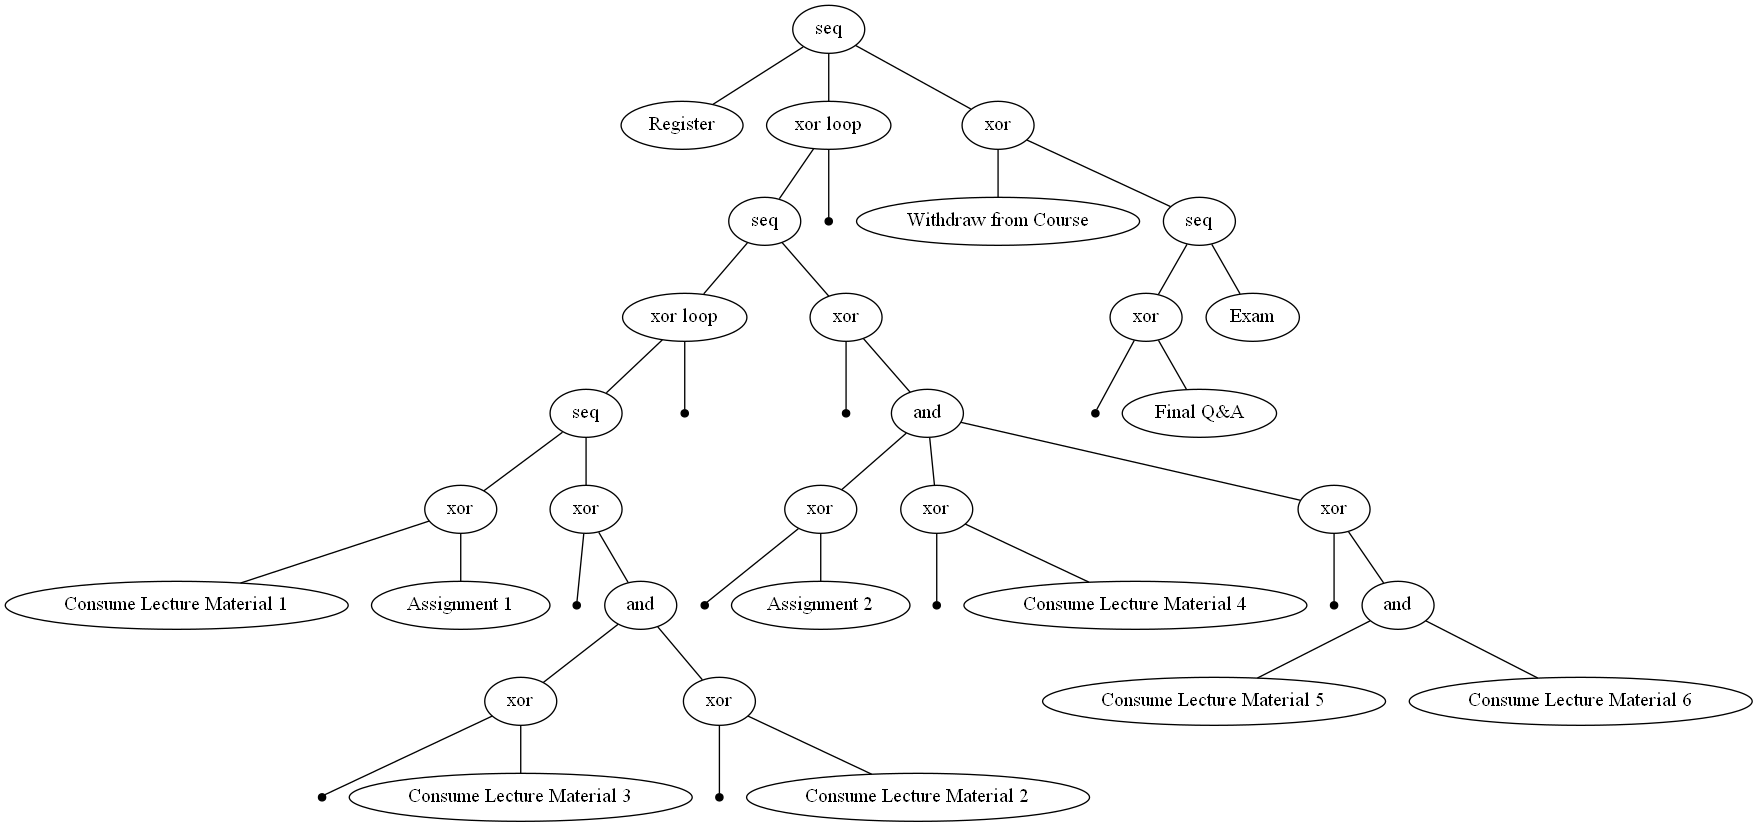

The Petri Net


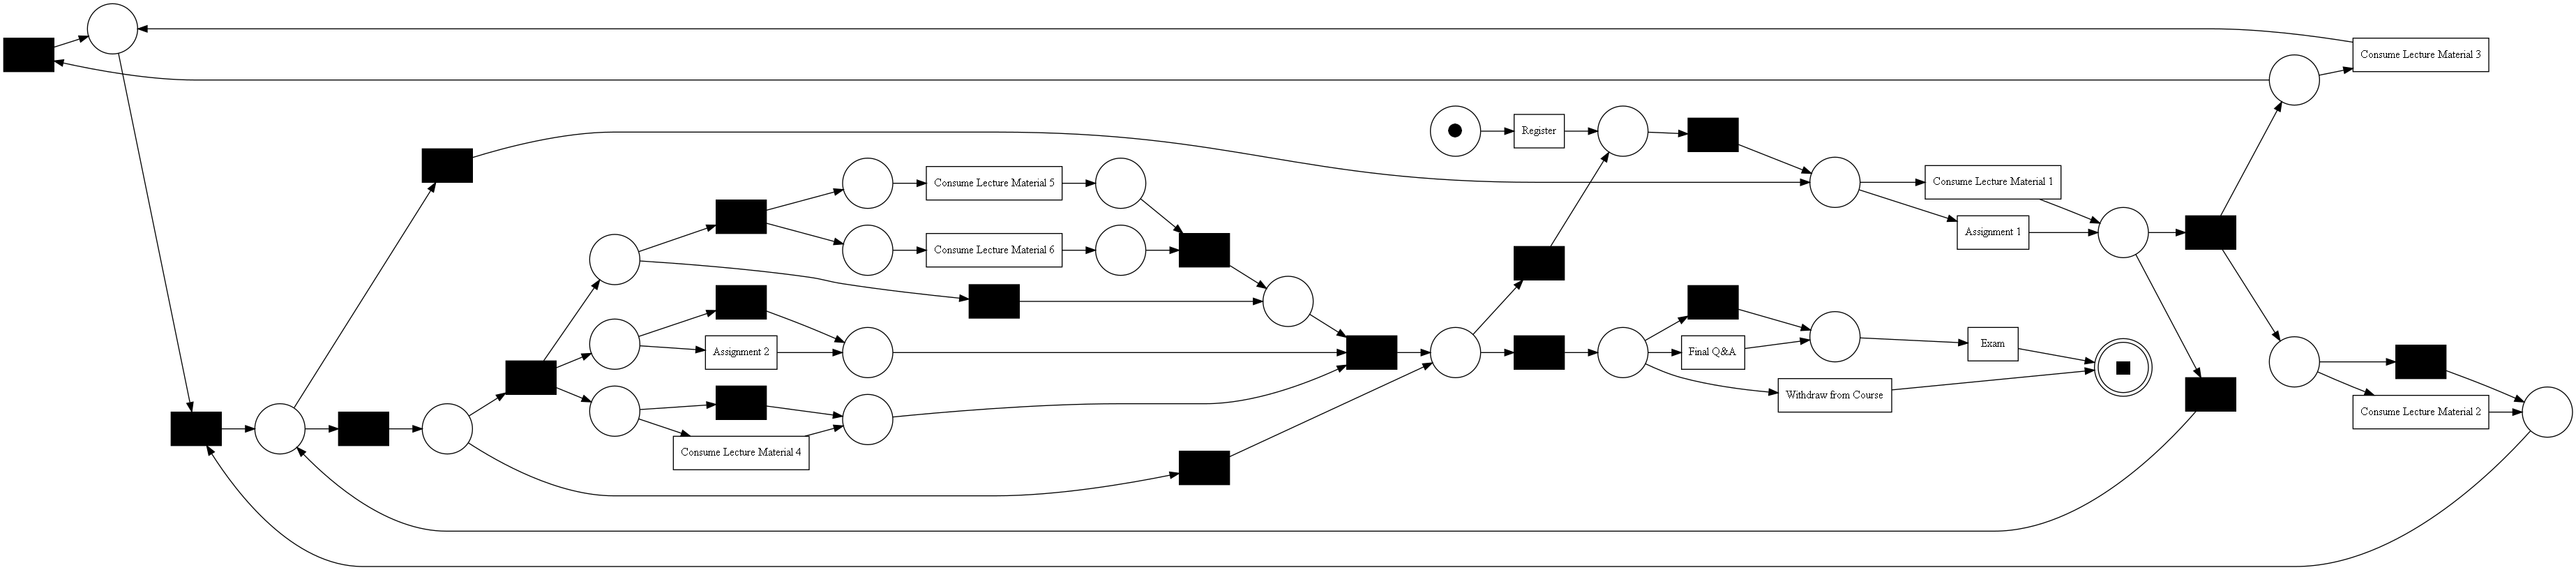

replaying log with TBR, completed variants :: 100%|██████████| 18/18 [00:00<00:00, 631.74it/s]


The Fitness of the Model with no Threshold is 100.00%

Threshold 0.2
The process tree


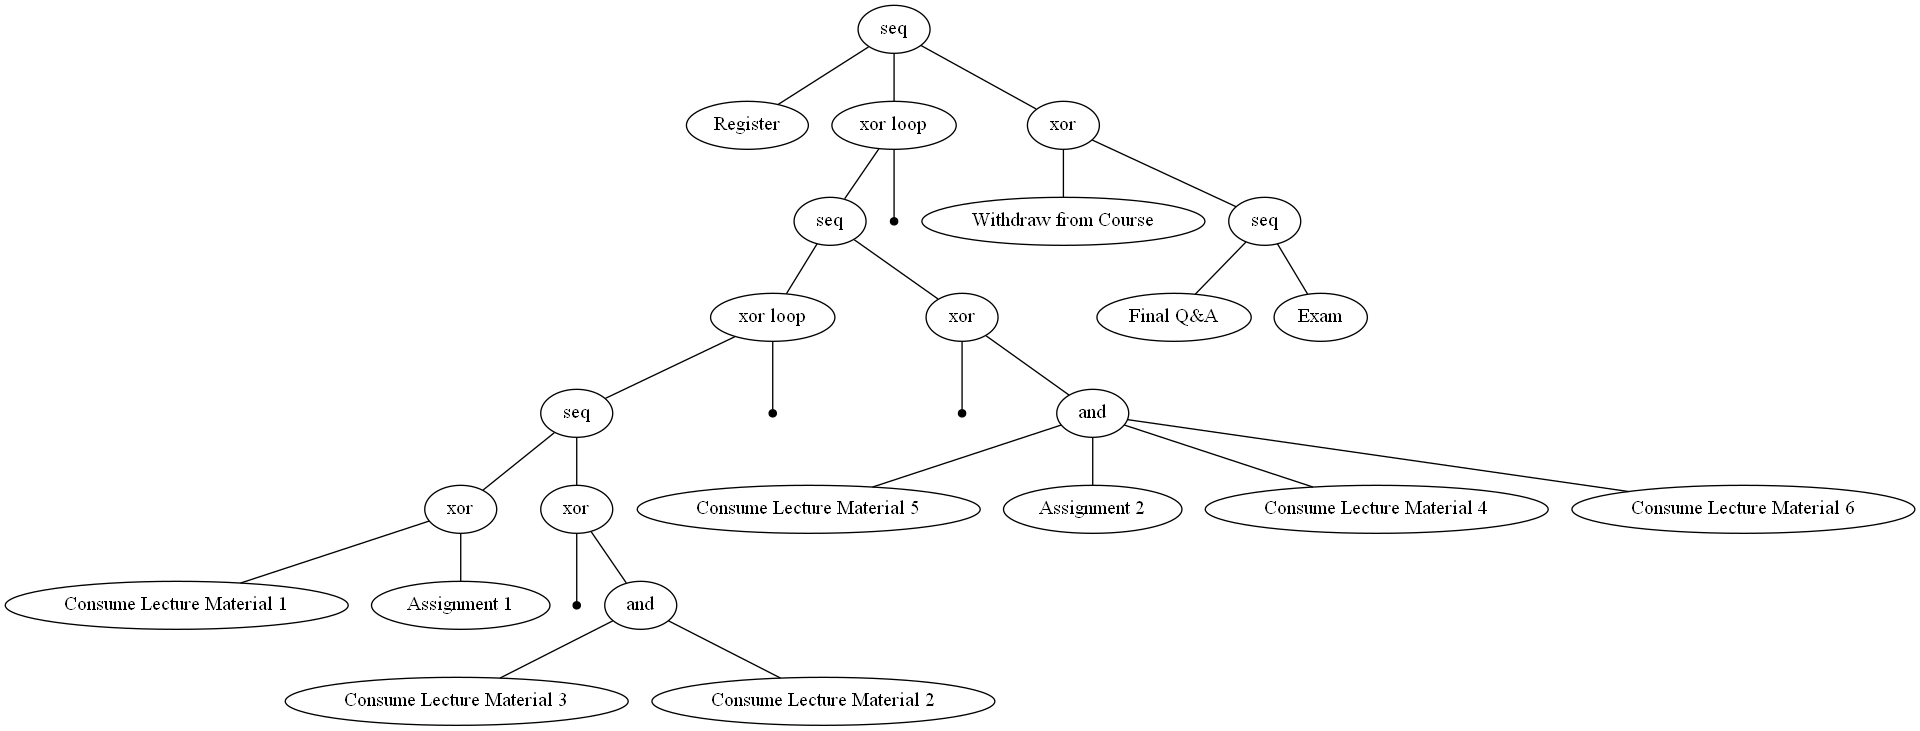

The Petri Net


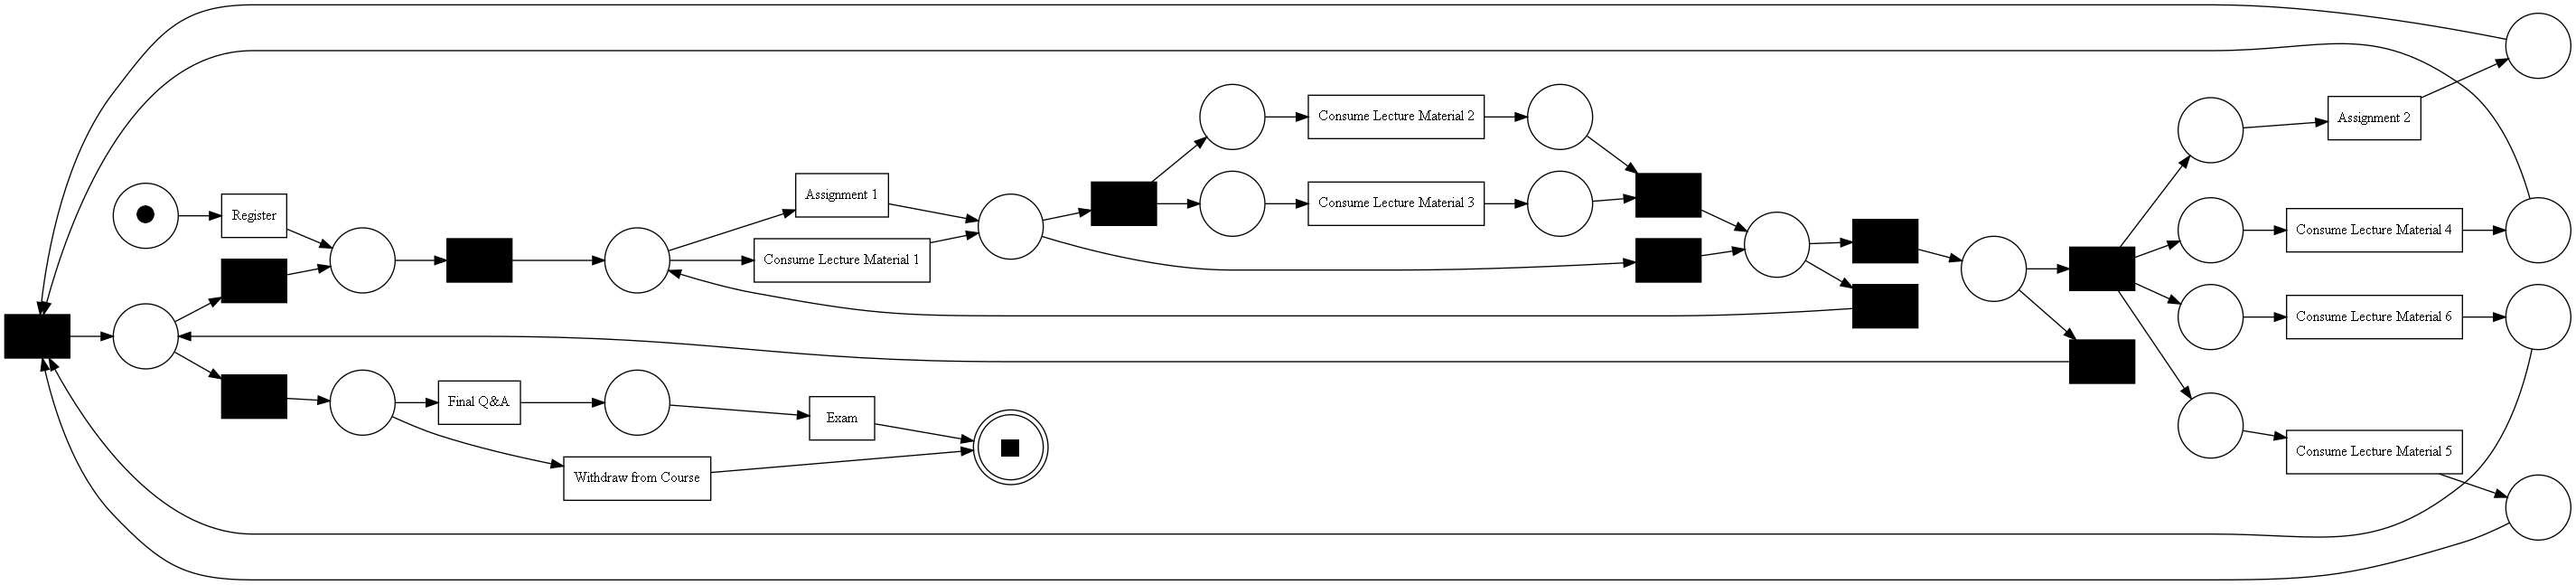

replaying log with TBR, completed variants :: 100%|██████████| 18/18 [00:00<00:00, 584.21it/s]


The Fitness of the Model is 98.45%


--------------- Exam Log ---------------

Threshold 0
The Process Tree


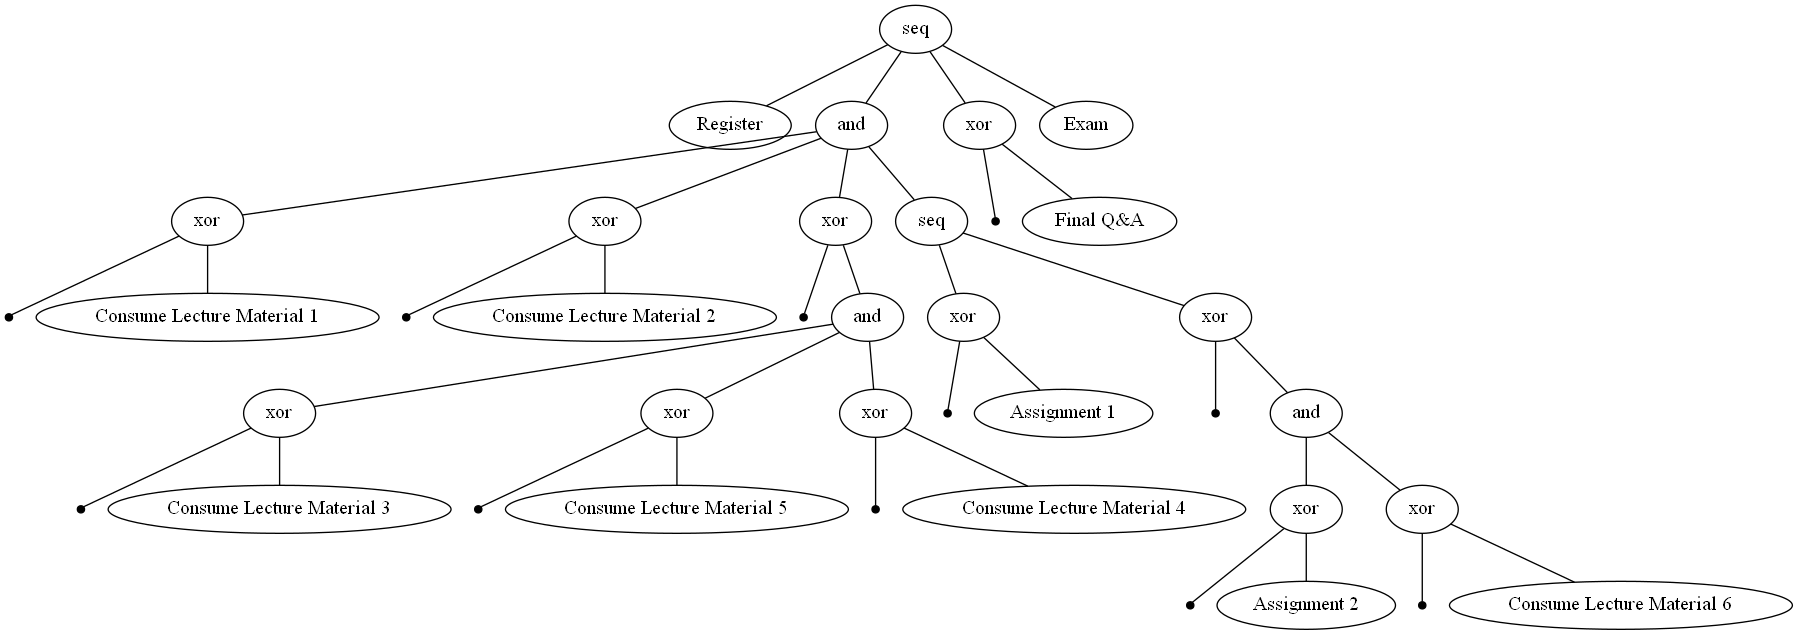

The Petri Net


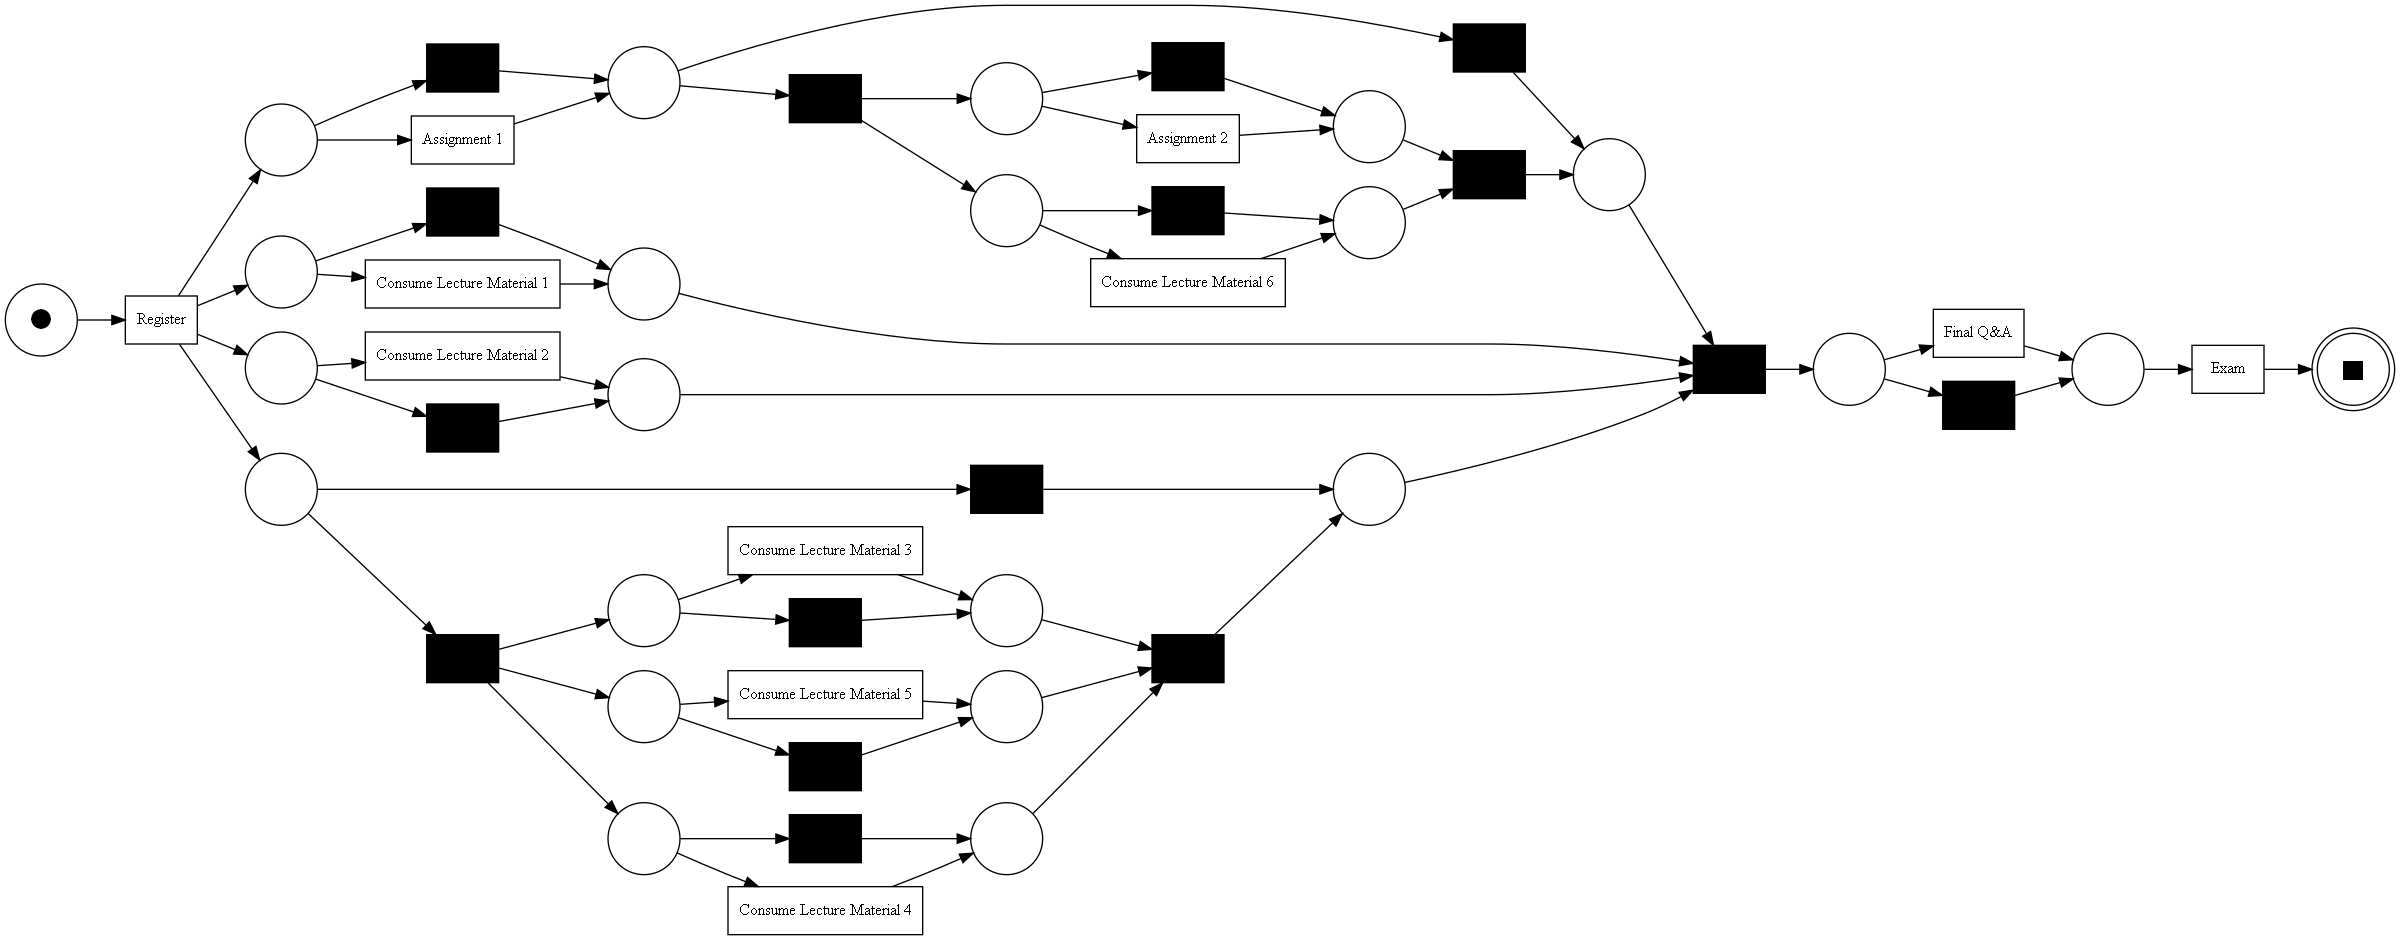

replaying log with TBR, completed variants :: 100%|██████████| 397/397 [00:00<00:00, 857.97it/s]


The Fitness of the Model with no Threshold is 100.00%

Threshold 0.2
The process tree


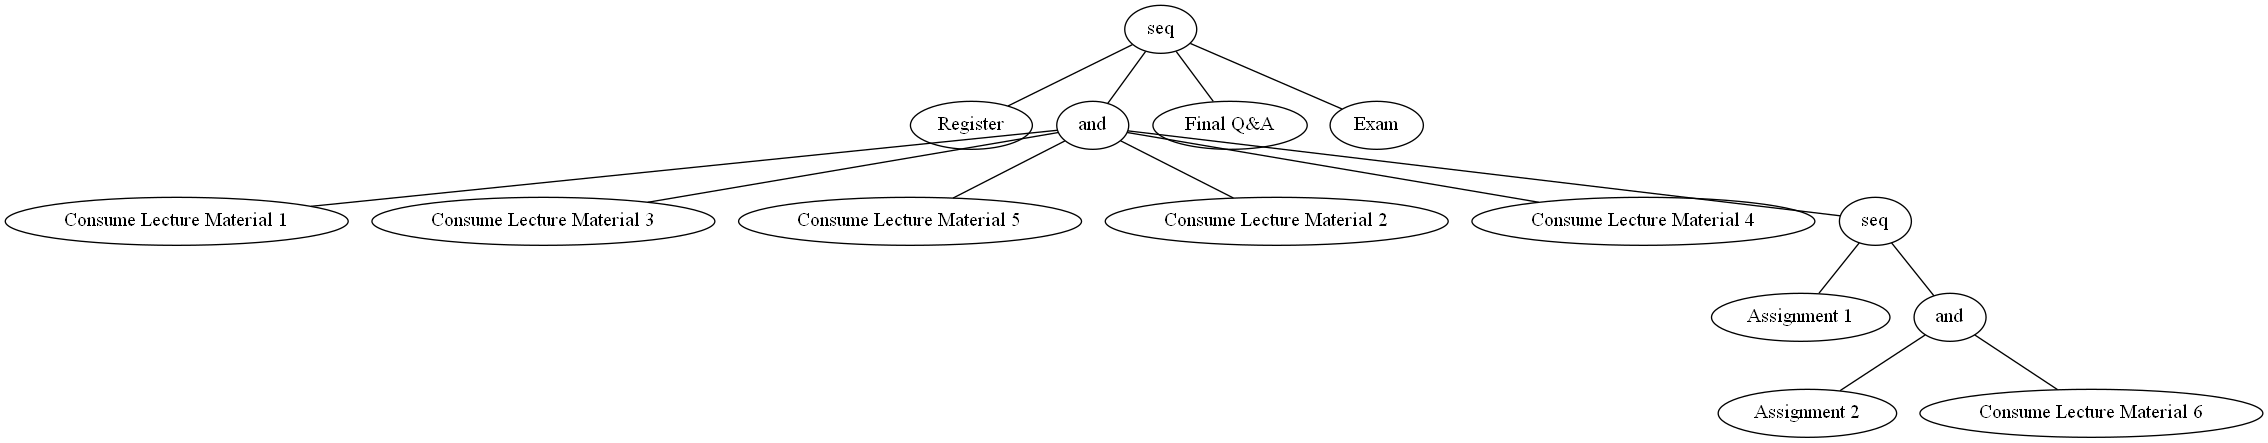

The Petri Net


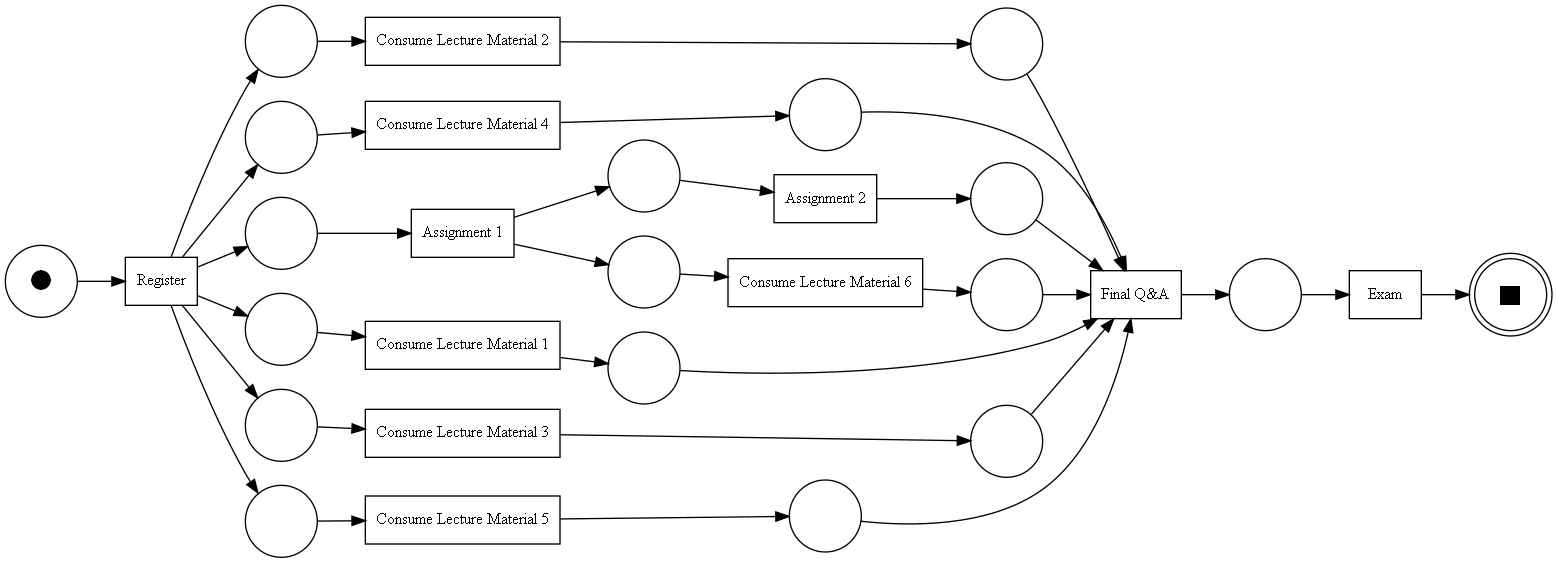

replaying log with TBR, completed variants :: 100%|██████████| 397/397 [00:00<00:00, 1579.52it/s]

The Fitness of the Model is 95.58%



In [61]:
logs = [log, log_varaint03, log_varaint05, log_exam]
labels = ["Original", "0.3", "0.5", "Exam"]

for single_log, label in zip(logs, labels):

    print(f"\n--------------- {label} Log ---------------\n")

    # IM Threshold 0
    print(f"Threshold 0")
    print("The Process Tree")

    # Executing the IM algorithm
    proc_tree = pm4py.discover_process_tree_inductive(single_log, noise_threshold=0)

    # display the process tree
    gviz = pt_visualizer.apply(
        proc_tree,
        parameters={
            pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"
        },
    )
    pt_visualizer.view(gviz)

    print("The Petri Net")
    # Convert the process tree to a Petri net
    net, im, fm = pt_converter.apply(proc_tree)
    pm4py.view_petri_net(net, im, fm, format="png")

    # Calculate the Petri net reachability
    fitness = replay_fitness_evaluator.apply(
        single_log,
        net,
        im,
        fm,
        variant=replay_fitness_evaluator.Variants.TOKEN_BASED,
    )
    print(
        f"The Fitness of the Model with no Threshold is {fitness['log_fitness'] *100:.2f}%\n"
    )

    # IM Threshold 0.2
    print(f"Threshold 0.2")
    print("The process tree")

    # Executing the IM algorithm with a threshold of 0.2
    proc_tree_filtered = pm4py.discover_process_tree_inductive(
        single_log, noise_threshold=0.2
    )

    # display the process tree
    gviz = pt_visualizer.apply(
        proc_tree_filtered,
        parameters={
            pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"
        },
    )
    pt_visualizer.view(gviz)

    print("The Petri Net")
    # Convert the process tree to a Petri net
    net, im, fm = pt_converter.apply(proc_tree_filtered)
    pm4py.view_petri_net(net, im, fm, format="png")

    # Calculate the Petri net reachability
    fitness = replay_fitness_evaluator.apply(
        single_log,
        net,
        im,
        fm,
        variant=replay_fitness_evaluator.Variants.TOKEN_BASED,
    )
    print(f"The Fitness of the Model is {fitness['log_fitness'] * 100:.2f}%\n")


*Your markdown for your discussion.*

### Paths of Excellence

**g)** As lectures are in a constant urge to improve their courses in a way that participants learn as much as possible ;), you are facing the research question to identify *paths of excellence*.
In particular, you should identify how the studying behavior differs between excellent students (**final exam score greater than or equal to 85**) and non-excellent students (**final exam score less than 85**).
Try to answer this research questions using techniques from the preceding Process Mining questions. 

*Hint: There is no single unique solution (e.g., in terms of parameter choice); therefore, it suffices if your "design choices" are reasonble.* \
*Hint: The final exam score is point score that is associated with the "Exam" event.*


In [62]:
# get all the students who have completed the exam with a final score of at least 85
# the range is [85, 100] as 100 is the maximum score
log_excellent = attributes_filter.apply_numeric(
    log_exam,
    85,
    100,
    parameters={
        attributes_filter.Parameters.ATTRIBUTE_KEY: "Points",
        attributes_filter.Parameters.STREAM_FILTER_KEY1: "concept:name",
        attributes_filter.Parameters.STREAM_FILTER_VALUE1: "Exam",
    },
)

# get all the students who have completed the exam with a final score of less than 85
log_non_excellent = attributes_filter.apply_numeric(
    log_exam,
    50,
    85,
    parameters={
        attributes_filter.Parameters.ATTRIBUTE_KEY: "Points",
        attributes_filter.Parameters.STREAM_FILTER_KEY1: "concept:name",
        attributes_filter.Parameters.STREAM_FILTER_VALUE1: "Exam",
    },
)

# get all the students who have completed the exam with a final score of less than 85
log_failed = attributes_filter.apply_numeric(
    log_exam,
    0,
    50,
    parameters={
        attributes_filter.Parameters.ATTRIBUTE_KEY: "Points",
        attributes_filter.Parameters.STREAM_FILTER_KEY1: "concept:name",
        attributes_filter.Parameters.STREAM_FILTER_VALUE1: "Exam",
    },
)

## Plotting
Now we will plot the excellent and non excellent study times against one another

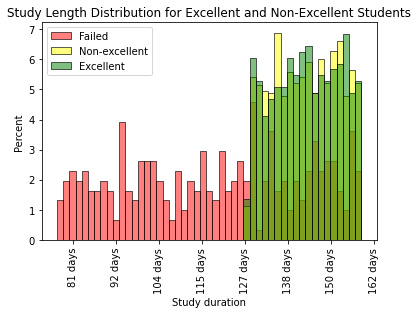

In [63]:
def day_formatter(x:int):
    """Returns a formatted string in form  
    [day] days

    Args:
        x (int): The given seconds
    
    Returns:
        str: The formatted string
    """
    days = int(x // (3600*24))
    
    return f"{days:d} days"
    

# extract all the cases sortet by the duration of the case in ascending order
cases_failed = list(case_statistics.get_cases_description(log_failed,parameters={"sort_by_index":3,"sort_ascending":True}).items())
cases_non_excellent = list(case_statistics.get_cases_description(log_non_excellent,parameters={"sort_by_index":3,"sort_ascending":True}).items())
cases_excellent = list(case_statistics.get_cases_description(log_excellent,parameters={"sort_by_index":3,"sort_ascending":True}).items())

# extract the duration of each case
case_duration_failed = [case[1]["caseDuration"] for case in cases_failed]
case_duration_non_excellent = [case[1]["caseDuration"] for case in cases_non_excellent]
case_duration_excellent = [case[1]["caseDuration"] for case in cases_excellent]

# create a histogram of the case duration
plt.title("Study Length Distribution for Excellent and Non-Excellent Students")
plt.xlabel("Study duration")

bins = np.linspace(min(case_duration_failed), max(case_duration_excellent + case_duration_non_excellent), 50)

sns.histplot(case_duration_failed, label="Failed",stat="percent",alpha = 0.5,color = "red", bins =bins)
sns.histplot(case_duration_non_excellent, label="Non-excellent",stat="percent",alpha = 0.5,color = "yellow",bins = bins)
plot = sns.histplot(case_duration_excellent, label="Excellent",stat="percent",alpha = 0.5, color = "green",bins = bins)

# Extract the labels, format them and set them as the x-axis ticks
xlabels = [day_formatter(x) for x in plot.get_xticks()]
plot.set_xticklabels(xlabels)

# rotate the x-axis labels
plt.xticks(rotation=90)
plt.legend()


## Averange Time between Study session

We will calculate the Average time between study sessions.  
The reasoning will be to filter students who started and didnt keep learning till the Exam.

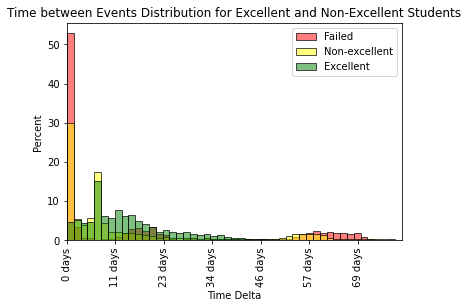

In [64]:
import time

# Extract all the time stamps from the log
excellent_times = [
    [event["time:timestamp"] for event in single_log] for single_log in log_excellent
]
non_excellent_times = [
    [event["time:timestamp"] for event in single_log]
    for single_log in log_non_excellent
]
failed_times = [
[event["time:timestamp"] for event in single_log]
    for single_log in log_failed
]

# get the difference between the subsequent timestamps
excellent_diff_times = np.array(
    [
        np.array(
            [
                (timestamps[i + 1] - timestamps[i]).total_seconds()
                for i in range(len(timestamps) - 1)
            ],
            dtype=int,
        )
        for timestamps in excellent_times
    ]
)
non_excellent_diff_times = np.array(
    [
        np.array(
            [
                (timestamps[i + 1] - timestamps[i]).total_seconds()
                for i in range(len(timestamps) - 1)
            ],
            dtype=int,
        )
        for timestamps in non_excellent_times
    ]
).flatten()
failed_diff_times = np.array(
    [
        np.array(
            [
                (timestamps[i + 1] - timestamps[i]).total_seconds()
                for i in range(len(timestamps) - 1)
            ],
            dtype=int,
        )
        for timestamps in failed_times
    ]
).flatten()

# Stack the arrays to get a single array to make plotting easier
excellent_diff_times = np.hstack(excellent_diff_times)
non_excellent_diff_times = np.hstack(non_excellent_diff_times)
failed_diff_times = np.hstack(failed_diff_times)

bins = np.linspace(min(failed_diff_times), max(non_excellent_diff_times), 50)

# create a histogram of the case duration
plt.title("Time between Events Distribution for Excellent and Non-Excellent Students")
plt.xlabel("Time Delta")
plt.xlim(0, max(max(excellent_diff_times), max(non_excellent_diff_times)))

sns.histplot(failed_diff_times, label="Failed",stat="percent",alpha = 0.5,color = "red",bins =bins)
sns.histplot(non_excellent_diff_times, label="Non-excellent",stat="percent",alpha = 0.5,color = "yellow",bins =bins)
plot = sns.histplot(excellent_diff_times, label="Excellent",stat="percent",alpha = 0.5, color = "green",bins =bins)

# Extract the labels, format them and set them as the x-axis ticks
xlabels = [day_formatter(x) for x in plot.get_xticks()]
plot.set_xticklabels(xlabels)

# rotate the x-axis labels
plt.xticks(rotation=90)
plt.legend()



## Lecture Attendence

We will compute the amount of Lectures attented.  
There are 12 Possible Events  
You can attend 6 lectures  
You can register  
You have 2 assignments  
You can withdraw  
You can go to the Final Q & A  
And you can write the Exam.

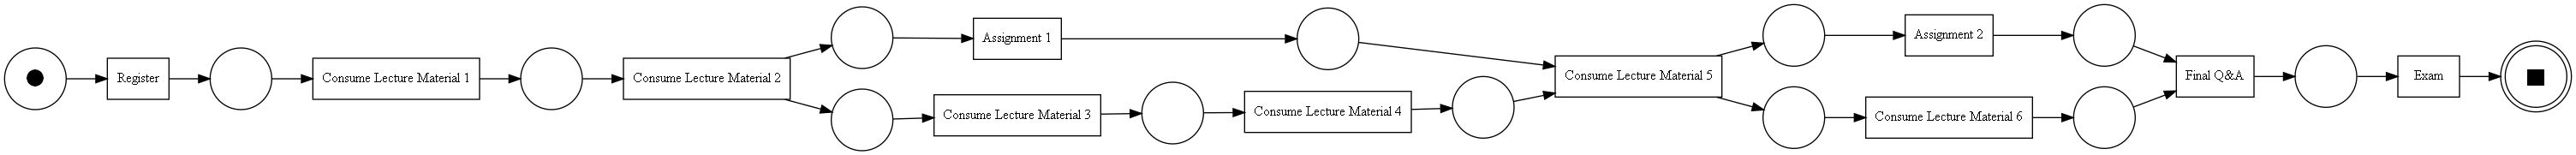

In [65]:
# Executing the IM algorithm
proc_tree = pm4py.discover_process_tree_inductive(log_excellent, noise_threshold=0.1)
# Convert the process tree to a Petri net
net, im, fm = pt_converter.apply(proc_tree)
pm4py.view_petri_net(net, im, fm, format="png")

** Discussion ** 

## Performance and Frequency Decoration

**h)** While the discovery of a process model is the most prototypical step in a process mining analysis, its enrichment by frequency and performance statistics is a very common step too. To this end, enrich the Petri net that you discovered for log_exam using Inductive Miner with noise threshold 0.2 by frequency and performance information. Plot two Petri nets decorated with frequency and performance information, respectively.

Describe your results. Can you observe any problems (in particular with respect to the initial process description)?

replaying log with TBR, completed variants :: 100%|██████████| 397/397 [00:00<00:00, 1532.04it/s]


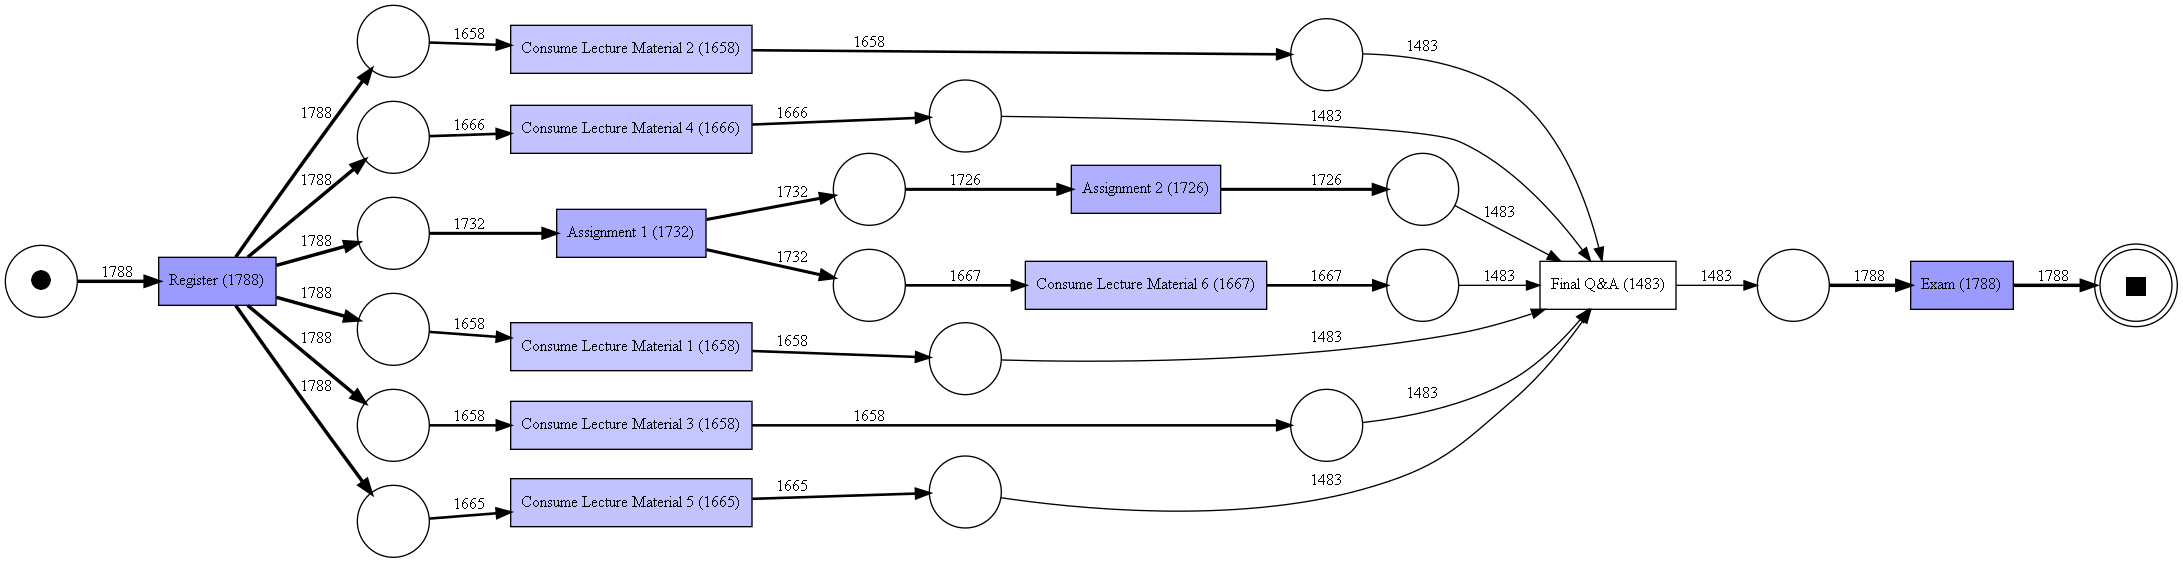

replaying log with TBR, completed variants :: 100%|██████████| 397/397 [00:00<00:00, 1556.56it/s]


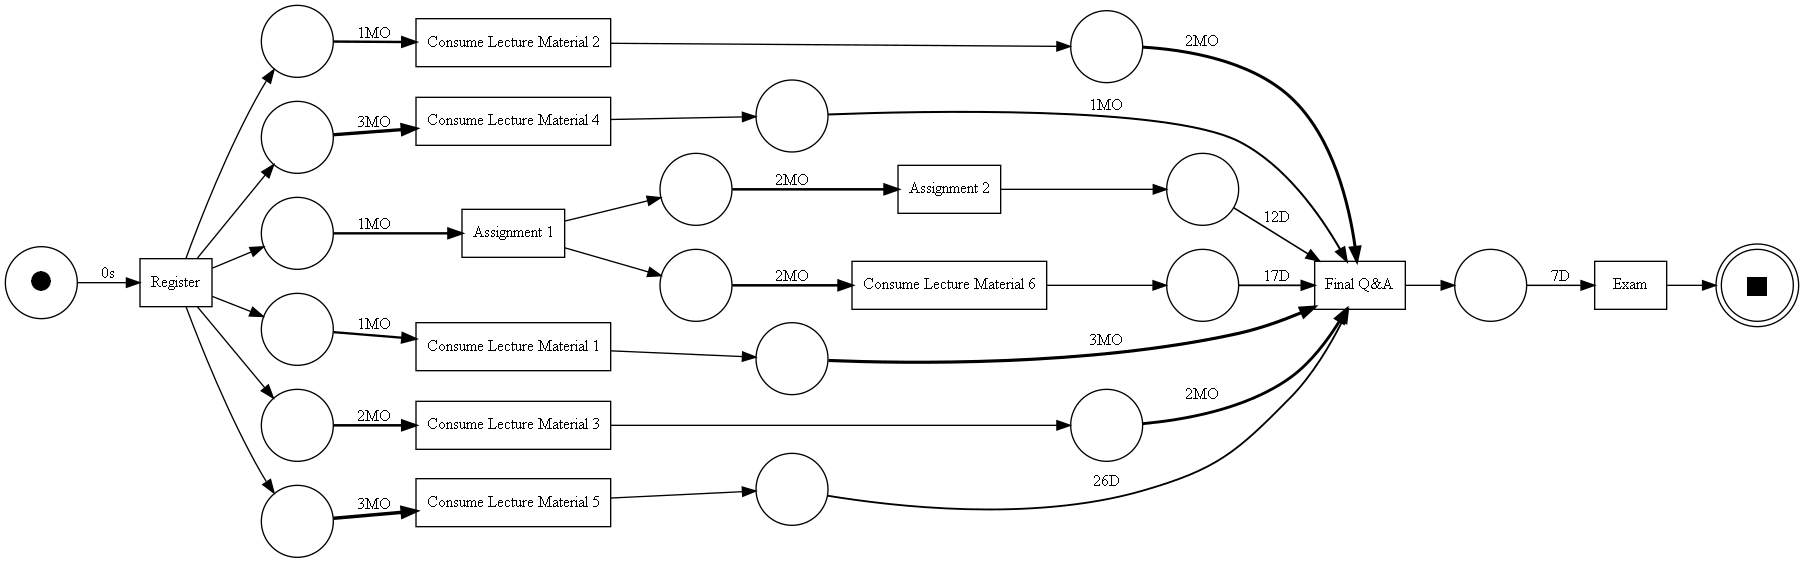

In [66]:
# Executing the IM algorithm
IM_Tree = pm4py.discover_process_tree_inductive(log_exam, noise_threshold=0.2)
# Convert the process tree to a Petri net
net, im, fm = pt_converter.apply(IM_Tree)

gviz = pn_visualizer.apply(
    net,
    im,
    fm,
    variant=pn_visualizer.Variants.FREQUENCY,
    log=log_exam,
)
pn_visualizer.view(gviz)

gviz = pn_visualizer.apply(
    net,
    im,
    fm,
    variant=pn_visualizer.Variants.PERFORMANCE,
    log=log_exam,
)
pn_visualizer.view(gviz)


*Your markdown for your discussion.*

## Process Mining Meets Advanced Visualization

### Studying Activity Heatmap

**a)** In this task, we are going to use advanced visualization techniques to create an overview over the course acitivities over time (**log.csv**).
In particular, you shall create a heatmap that shows how often activities occur in a particular week. 
Your heatmap should adhere to the following specification:
- y-axis: Shows the activity labels
- x-axis: Time in terms of course weeks. See the following example snippet:
<div>
<img src="templates/PMAV_HeatmapXAxisSnippet.png" width="100"/>
</div>
- data: The bucket counts should be derived from **log.csv**

Using this configuration, the bucket 2021-11-24 till 2021-12-01 with y-axis label "Exam" and value v would be read as:
In the week between 2021-11-24 and 2021-12-01 v exams took place.

Describe your result. Which patterns do you observe?

<AxesSubplot:xlabel='Week', ylabel='Activity'>

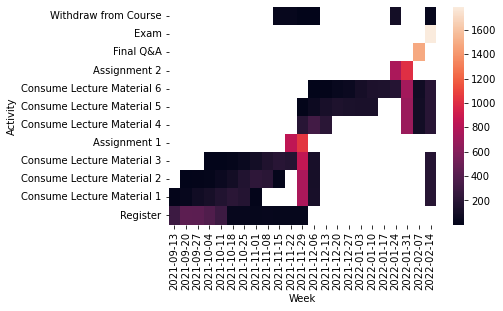

In [67]:
from datetime import datetime, timedelta

raw_log = pd.read_csv("dataset/log.csv", sep=",")

# Convert the Timestamp to datetime
raw_log["Timestamp"] = pd.to_datetime(raw_log["Timestamp"])

# Extract the Week
# The Function sets the Week as the first day of the week
# 
raw_log["Week"] = raw_log["Timestamp"].apply(
    lambda x: (x.date() - timedelta(days=x.date().weekday()))
)


# Group the log by the activity and the week and count the number of occurences in each category
# We use lifecycle as a proxy for the number of occurences
grouped_log = raw_log.groupby(["Activity", "Week"])["Lifecycle"].count()

# Get the Pivot Table of the grouped log
pivot_table = grouped_log.unstack()

# Fill NaN values with 0
# Makes the heatmap harder to read
# pivot_table.fillna(0, inplace=True)

# Reorder the columns
pivot_table.index = pd.CategoricalIndex(
    pivot_table.index,
    categories=[
        "Withdraw from Course",
        "Exam",
        "Final Q&A",
        "Assignment 2",
        "Consume Lecture Material 6",
        "Consume Lecture Material 5",
        "Consume Lecture Material 4",
        "Assignment 1",
        "Consume Lecture Material 3",
        "Consume Lecture Material 2",
        "Consume Lecture Material 1",
        "Register",
    ],
)
pivot_table.sort_index(level=0, inplace=True)

sns.heatmap(pivot_table)


*Your markdown for your discussion.*

**b)** Can you relate the patterns that you observe in the heatmap to the process models that you discovered in question **Q5 - f)**?

*Hint: In contrast to the other questions, this question is deliberately less explicit. You may approach it having the following question in mind: \
Is there a pattern in the heatmap that explains why a certain process model shows a certain behavior/control flow?*

*Your markdown for your discussion.*  
Yes (TODO)

### Process Flow

**c)** Assume that another process analyst also had access to the event log. 
Given the data, he created the following novel entities:
- 'Block 1 Complete': The participant downloaded the entire material of the first lecture block (materials 1, 2, and 3). (Not considering when he downloaded it)
- 'Block 1 Incomplete': The participant did not download the entire material of the first lecture block
- 'Block 2 Complete': See 'Block 1 Complete'
- 'Block 2 Incomplete': See 'Block 1 Incomplete'
- 'Ass 1 Excellent': Participant scored at least 85 points in the first part of the assignment
- 'Ass 1 Not Excellent': Participant scored less than 85 points in the part of the assignment
- 'Ass 2 Not Excellent', 'Ass 2 Excellent', 'Exam Not Excellent', 'Exam Excellent': Similar to 'Ass 1 Excellent' and 'Ass 1 Not Excellent'
- 'Withdraw': Participant dropped the course

Based on the entities he derived a set of flow, for example, the flow between 'Block 1 Complete' and 'Ass 1 Excellent' describes how often a partipant who consumed the first lecture block scored excellent in the first part of the assignment.

The next cell loads the entities and flows for you. The flows are stored as a dictionary following the pattern:

    (source, target): flow_value
    
where source and target are indices into the entities list.

Create a **Sankey diagram** that visulizes these flows. Please use `plotly.graph_object.Sankey` to create the diagram.

Briefly **describe** your results.
Moreover, **discuss** this visualization considering your knowlege from the Process Mining task.

*Hint: Having a look at the Sankey diagram will make the analyst's idea behind the entities much clearer.*

In [68]:
with open('./dataset/sankeyEntities.pkl', 'rb') as f:
    entities = pickle.load(f)
with open('./dataset/sankeyFlows.pkl', 'rb') as f:
    flows = pickle.load(f)

In [69]:
# Reformat the data to be compatible with the Sankey plot

# A really scuffed way to do this
source, target = np.split(np.array(list(flows.keys())), 2, axis=1)
source = source[:,0]
target = target[:,0]

value = np.array(list(flows.values()))


In [70]:
# Default Sankey Diagram
fig = go.Figure(
    data=[
        go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color="black", width=0.5),
                label=entities,
                color="blue",
            ),
            link=dict(
                source=source,
                target=target,
                value=value,
            ),
        )
    ]
)

fig.update_layout(title_text="Sankey Diagramm of the Student Flows", font_size=10)
fig.show()


*Your markdown for your discussion.*

# Question 6 - Big Data (15 points) 

### Problem Description
You are working at a finance company that makes loans to individuals and businesses. As a process analyst in *business intelligence team*, you are expected to deliver data-driven insights to improve business processes of the company. Recently, your boss asked you to discover a comprehensive process model of 10 international branches using your big data skills. Your colleague already tried it using commercial on-premise tools, but, due to the immense size of the data, he didn't manage to even load the data to the tool. You are planning to 1) load the datasets from 10 different branches to Hadoop Distributed File System (HDFS), 2) preprocess them using HDFS, and 3) use MapReduce programming model to discover a comprehensive process model. 

### Preparation
The preparation of this problem consists of two steps:

**Preparation step 1**: Replace the filepath to your own filepath to produce the **LoanApplication.csv**.  

In [71]:
import pandas as pd
#your filepath
filepath = "./dataset/LoanApplication.csv"
original_log = pd.read_csv(filepath,sep=",")
original_log.head()

,eventID,CaseID,Activity,Timestamp,LoanGoal,ApplicationType,RequestedAmount,Action,FirstWithdrawalAmount,Accepted,NumberOfTerms,OfferID,org:resource,MonthlyCost,EventOrigin,EventID,Selected,CreditScore,OfferedAmount,Duration
0,661035,Application_1000086665,A_Create Application,18601566,"Other, see explanation",New credit,5000.0,Created,NaN,NaN,NaN,NaN,User_1,NaN,Application,Application_1000086665,NaN,NaN,NaN,0
1,661036,Application_1000086665,A_Submitted,18601566,"Other, see explanation",New credit,5000.0,statechange,NaN,NaN,NaN,NaN,User_1,NaN,Application,ApplState_161925113,NaN,NaN,NaN,0
2,661040,Application_1000086665,A_Concept,18601632,"Other, see explanation",New credit,5000.0,statechange,NaN,NaN,NaN,NaN,User_1,NaN,Application,ApplState_385184570,NaN,NaN,NaN,0
3,661041,Application_1000086665,W_Complete application,18679694,"Other, see explanation",New credit,5000.0,Obtained,NaN,NaN,NaN,NaN,User_14,NaN,Workflow,Workitem_518019192,NaN,NaN,NaN,0
4,661043,Application_1000086665,A_Accepted,18767152,"Other, see explanation",New credit,5000.0,statechange,NaN,NaN,NaN,NaN,User_5,NaN,Application,ApplState_856156982,NaN,NaN,NaN,0


**Preparation step 2**: In this question, we generate 10 event logs based on the ``original_log``. For randomization, you need to use the sum of the group's matriculation numbers (e.g., a group with 3 students having "100000", "100001", and "100002" as their matriculation numbers will use "300003" for the randomization).

In [72]:
# Below are GIVEN utility functions (do not modify):
import random
import os
def _ramdomize(x):
    random_val = random.randint(5,10)
    return x+random_val

def _randomize_log(log,matriculation_num):
    """Randomize case attributes based on the matriculation number

    Keyword arguments:
    log -- event log
    matriculation_num - sum of matriculation numbers
    """
    attribute_cols = ["Duration"]
    random.seed(matriculation_num)
    for attr in attribute_cols:
        log[attr] = log[attr].apply(_ramdomize)
    return log

def _extract_log(log,iter_num):
    """Extract n-th log to ./generated_logs/

    Keyword arguments:
    log -- event log
    iter_num -- n-th iteration
    """
    log.to_csv("./generated_logs/generated_log-{}.tsv".format(iter_num),header=False,index=False, sep="\t",line_terminator="")

def generate_log(original_log,num_replication,mat_num):
    """Generate logs (randomized by the matriculation number and extracted to ./generated_logs/) 

    Keyword arguments:
    log -- event log
    num_replication -- number of generated logs
    mat_num -- sum of matriculation numbers
    """
    case_col="CaseID"
    timestamp_col = "Timestamp"
    dir_path = "./generated_logs"
    try:
        os.mkdir(dir_path)
    except OSError:
        print ("Directory already exists: %s" % dir_path)
    else:
        print ("Successfully created the directory %s " % dir_path)
    
    for i in range(num_replication):
        print("starts {}".format(i))
        generated_log = original_log.copy(deep=True)
        generated_log[case_col] = str(i) + generated_log[case_col]
        generated_log[timestamp_col] = generated_log[timestamp_col].apply(str).str.zfill(10)
        randomized_log = _randomize_log(generated_log,mat_num)
        _extract_log(randomized_log,i)
        print ("Successfully created %i th log at %s "% (i,dir_path))

Replace the SUM_MAT_NUM to yours to generate logs.

In [73]:
# your code
SUM_MAT_NUM = 154031 
NUM_REPITITION=10
generate_log(original_log,NUM_REPITITION,SUM_MAT_NUM)

Directory already exists: ./generated_logs
starts 0
Successfully created 0 th log at ./generated_logs 
starts 1
Successfully created 1 th log at ./generated_logs 
starts 2
Successfully created 2 th log at ./generated_logs 
starts 3
Successfully created 3 th log at ./generated_logs 
starts 4
Successfully created 4 th log at ./generated_logs 
starts 5
Successfully created 5 th log at ./generated_logs 
starts 6
Successfully created 6 th log at ./generated_logs 
starts 7
Successfully created 7 th log at ./generated_logs 
starts 8
Successfully created 8 th log at ./generated_logs 
starts 9
Successfully created 9 th log at ./generated_logs 


### 6.1. Hadoop Distributed File System (HDFS)

Now, it's time to work with the Hadoop Distributed File System (HDFS). The goal of this task is to merge 10 event logs at your disk using HDFS. Follow the instructions below and show your results in each step (screenshots of the command line). We use "letter identifier" for this task (The letter identifier is the string consisting of the first letters of the group memebers' first names, e.g., for the group with "Antonio Rüdiger", "Bernd Leno", "Christian Günter", the indentifier is "ABC").

    1) Import the event logs to your Docker engine (at /usr/local/hadoop/(identifier)-generated-logs/).
    2) Upload the event logs to the running HDFS (at /input/(identifier)-generated-logs/). 
    3) Merge all the files and copy the result back to HDFS (at /input/(identifier)-final-log-10.tsv).
    4) Merge 6 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-6.tsv).
    5) Merge 2 files (you can randomly select) and copy the result back to HDFS (at /input/(identifier)-final-log-2.tsv).
    6) Print out the completely-merged event log from 3), i.e., "(identifier)-final-log-10.tsv", in the command line (the screenshot may contain 10 rows).

In [74]:
#your code
from IPython.display import Image
# Image(filename='your_path_to_screenshot_of_a1')

In [75]:
#your code
#Image(filename='your_path_to_screenshot_of_a2') 

In [76]:
#your code
#Image(filename='your_path_to_screenshot_of_a3') 

In [77]:
#your code
#Image(filename='your_path_to_screenshot_of_a4') 

### 6.2. Process Discovery

Discover a process model from the completely merged event log using MapReduce algorithms. Explain how you discover the process model with the following deliverables:

    1) Mapper function (as python file(s))
    2) Reducer function (as python file(s))
    3) Hadoop commands for MapReduce computation (as text file)
    4) Jupyter notebook script that visualize (1) a directly-follows graph and (2) a Petri net  based on the computed directly-follows relations.

<font color='red'>Important!</font> Please note that in this task, your result will be evaluated based on whether they are reproducible from your explanation. If you skip MapReduce computations for this task, you will get 0 points.The deliverables of 1), 2), and 3) should be submitted as outputs. 

In [78]:
# your code

### 6.3. Performance Analysis

a) Compute the total service time for each case based on MapReduce algorithms using the completely-merged event log (i.e., (identifier)-final-log-10.tsv) and visualize 100 cases that show the longest total service time using any chart.
    
The deliverables of 1), 2), 3) and 4) should be submitted as outputs:
```
1) Mapper function (as python file(s))
2) Reducer function (as python file(s))
3) Hadoop commands for MapReduce calculation (as text file)
4) Result: total service times for cases (as text file)
```

b) Compare the (approximate) computation time of the service time calculation between 1. the completely-merged event log (i.e., (identifier)-final-log-10.tsv), 2. 6-merged event log (i.e., (identifier)-final-log-6.tsv), and 3. 2-merged event log (i.e., (identifier)-final-log-2.tsv). Interpret the difference (e.g., the computation time scales linearly with the increasing number of events).

In [79]:
# your code